### Location Input

In [140]:
import googlemaps
import os

# User Input with autocomplete using Google Maps API
def get_location():
    API_KEY = os.environ.get('GOOGLE_MAPS_API_KEY')
    gmaps = googlemaps.Client(key=API_KEY)
    geocordinates = gmaps.geocode(input('Enter your location: '))[0]['geometry']['location']
    return geocordinates
get_location()


{'lat': 24.1989544, 'lng': 82.6676209}

In [2]:
"""Testing the function"""
# data = [{'address_components': [{'long_name': 'Singrauli', 'short_name': 'Singrauli', 'types': ['locality', 'political']}, {'long_name': 'Singrauli', 'short_name': 'Singrauli', 'types': ['administrative_area_level_3', 'political']}, {'long_name': 'Rewa Division', 'short_name': 'Rewa Division', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Madhya Pradesh', 'short_name': 'MP', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'India', 'short_name': 'IN', 'types': ['country', 'political']}], 'formatted_address': 'Singrauli, Madhya Pradesh, India', 'geometry': {'bounds': {'northeast': {'lat': 24.2109604, 'lng': 82.6867104}, 'southwest': {'lat': 24.1869257, 'lng': 82.6352118}}, 'location': {'lat': 24.1989544, 'lng': 82.6676209}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 24.2109604, 'lng': 82.6867104}, 'southwest': {'lat': 24.1869257, 'lng': 82.6352118}}}, 'place_id': 'ChIJgf8xwzU6jzkR-sONorrkAAU', 'types': ['locality', 'political']}]

# geocordinates = data[0]['geometry']['location']

'Testing the function'

In [3]:
# Date and Time Input
from datetime import datetime
def get_date_time(message='Enter date (YYYY-MM-DD):'):
    date = input(message)
    return date

### Hourly Variables
| Variable                            | Impact on Weather or Climate                                                                                                           |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| Temperature (2 m)                   | Directly affects evaporation rates, air density, and influences overall weather patterns and climate.                                   |
| Relative Humidity (2 m)             | Determines moisture in the air, influencing precipitation potential and perceived comfort levels.                                       |
| Dewpoint (2 m)                      | Indicates moisture saturation; when reached, it leads to cloud formation and potential precipitation.                                   |
| Apparent Temperature                | Reflects perceived temperature by combining actual temperature and humidity, affecting how organisms experience weather.                |
| Precipitation (rain + snow)         | Supplies water to ecosystems, influences soil moisture, and drives hydrological processes.                                              |
| Rain                                | Critical for agriculture, water resources, and vegetation growth, affecting local and regional climates.                                |
| Snowfall                            | Contributes to snowpack and water reserves, with implications for winter sports and ecosystem health.                                   |
| Snow depth                          | Influences road conditions, agriculture, and overall water availability upon melting.                                                   |
| Weather code                        | Summarizes prevailing conditions, offering quick reference to weather patterns and potential climate impacts.                           |
| Sealevel Pressure                   | Affects wind formation and large-scale weather systems, driving movements of air masses.                                                 |
| Surface Pressure                    | Influences local wind patterns and can signal approaching weather systems or changes.                                                    |
| Cloud cover Total                   | Modulates solar radiation, temperature, and can indicate the likelihood of precipitation.                                                |
| Cloud cover Low                     | Influences near-surface temperatures and local precipitation events.                                                                    |
| Cloud cover Mid                     | Affects weather system development and mid-level atmospheric conditions.                                                                 |
| Cloud cover High                    | Impacts radiation balance and can signal approaching large-scale weather changes.                                                        |
| Reference Evapotranspiration (ET₀) | Guides water management in agriculture, indicating how much water crops need based on atmospheric conditions.                            |
| Vapour Pressure Deficit             | Shows the atmosphere’s drying power; higher values increase plant water demand and evaporation.                                          |
| Wind Speed (10 m)                   | Affects local weather conditions, air dispersion, and can impact transportation and outdoor activities.                                 |
| Wind Speed (100 m)                  | Important for wind energy assessments and forecasting broader weather systems.                                                           |
| Wind Direction (10 m)               | Drives local weather patterns and pollution dispersion.                                                                                 |
| Wind Direction (100 m)              | Influences large-scale weather systems and is relevant to aviation.                                                                     |
| Wind Gusts (10 m)                   | Can cause sudden changes in conditions, affecting outdoor safety and infrastructure.                                                    |
| Soil Temperature (0-7 cm)           | Impacts seed germination, microbial activity, and plant emergence.                                                                      |
| Soil Temperature (7-28 cm)          | Influences root development and nutrient cycling in deeper soil layers.                                                                 |
| Soil Temperature (28-100 cm)        | Affects growth of deep-rooted plants, moderating soil processes over time.                                                              |
| Soil Temperature (100-255 cm)       | Plays a role in groundwater recharge and long-term soil and climatic interactions.                                                      |
| Soil Moisture (0-7 cm)              | Critical for surface runoff, plant water availability, and soil erosion processes.                                                      |
| Soil Moisture (7-28 cm)             | Influences root uptake, plant stress, and evaporation rates.                                                                            |
| Soil Moisture (28-100 cm)           | Affects water availability for deeper root systems and soil water storage capacity.                                                     |
| Soil Moisture (100-255 cm)          | Helps maintain long-term moisture reserves, impacting groundwater and broader climate feedbacks.                                        |


In [4]:
base_url = "https://archive-api.open-meteo.com/v1/archive?"

# Hourly weather data
def get_hourly_weather_data(geocordinates, start_date, end_date):
    hourly_variables = [
        "temperature_2m",
        "relative_humidity_2m",
        "dewpoint_2m",
        "apparent_temperature",
        "precipitation",
        "rain",
        "snowfall",
        "snow_depth",
        "weather_code",
        "pressure_msl",
        "surface_pressure",
        "cloud_cover",
        "cloud_cover_low",
        "cloud_cover_mid", 
        "cloud_cover_high",
        "et0_fao_evapotranspiration",
        "vapour_pressure_deficit",
        "wind_speed_10m",
        "wind_speed_100m", 
        "wind_direction_10m",
        "wind_direction_100m",
        "wind_gusts_10m",
        "soil_temperature_0_to_7cm",
        "soil_temperature_7_to_28cm",
        "soil_temperature_28_to_100cm",
        "soil_temperature_100_to_255cm",
        "soil_moisture_0_to_7cm",
        "soil_moisture_7_to_28cm",
        "soil_moisture_28_to_100cm",
        "soil_moisture_100_to_255cm"
    ]

    url = base_url
    print("Start Date should be less than End Date\n")
    latitude = geocordinates['lat']
    longitude = geocordinates['lng']

    # https://archive-api.open-meteo.com/v1/archive?latitude=24.1997&longitude=82.6753&start_date=2010-01-01&end_date=2019-12-31&hourly=et0_fao_evapotranspiration,wind_direction_100m,soil_moisture_100_to_255cm&daily=weather_code,temperature_2m_max,temperature_2m_min,sunrise,sunset,daylight_duration,precipitation_sum,rain_sum,et0_fao_evapotranspiration&timezone=GMT&models=best_match
    
    # Parameters with specific group of variables for hourly data for specific type of trend the user wants to see
    url += f"latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly="
    for variable in hourly_variables:
        url += variable + ","
    
    url += "&timezone=GMT&models=best_match"
    return url
        


    

## Daily Variables
| Variable                            | Impact on Weather or Climate                                                                                                           |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| Weather code                        | Describes the overall weather conditions, aiding in forecasting and climate analysis.                                                 |
| Maximum Temperature (2 m)           | Indicates the highest temperature reached, affecting heatwaves and energy consumption.                                               |
| Minimum Temperature (2 m)           | Indicates the lowest temperature achieved, impacting frost formation and agriculture.                                                |
| Mean Temperature (2 m)              | Represents the average temperature, crucial for climate studies and trend analysis.                                                   |
| Maximum Apparent Temperature (2 m)  | Reflects the highest perceived temperature, combining actual temperature and humidity, affecting human comfort.                        |
| Minimum Apparent Temperature (2 m)  | Reflects the lowest perceived temperature, influencing human comfort and heating requirements.                                        |
| Mean Apparent Temperature (2 m)     | Represents the average perceived temperature, important for assessing overall comfort levels.                                         |
| Sunrise                             | Marks the start of daylight, influencing daily cycles and solar energy availability.                                                  |
| Sunset                              | Marks the end of daylight, affecting daily cycles and solar energy planning.                                                           |
| Daylight Duration                   | Duration of daylight affects photosynthesis, energy consumption, and daily activities.                                                 |
| Sunshine Duration                   | Amount of sunshine influences solar power generation, plant growth, and UV exposure.                                                 |
| Precipitation Sum                   | Total precipitation is vital for water resource management, agriculture, and flood forecasting.                                         |
| Rain Sum                            | Total rainfall affects agriculture, water supply, and flood risks.                                                                     |
| Snowfall Sum                        | Total snowfall impacts water reserves, transportation, and winter activities.                                                          |
| Precipitation Hours                 | Number of hours with precipitation affects soil moisture and flood risk assessment.                                                   |
| Maximum Wind Speed (10 m)           | Affects wind energy potential, weather severity, and structural safety.                                                                |
| Maximum Wind Gusts (10 m)           | Indicates extreme wind events, impacting building safety and outdoor activities.                                                        |
| Dominant Wind Direction (10 m)      | Influences weather patterns, pollution dispersion, and maritime navigation.                                                             |
| Shortwave Radiation Sum             | Total incoming solar radiation impacts temperature regulation, photosynthesis, and energy balance.                                    |
| Reference Evapotranspiration (ET₀)  | Guides irrigation planning and water resource management by estimating atmospheric demand for moisture.                                   |

Understanding WMO Weather Codes
Common WMO Weather Codes and their meanings:

| Code | Weather Condition | Description |
|------|------------------|-------------|
| 0 | Clear sky | Complete absence of clouds |
| 1 | Mainly clear | 1/8 to 2/8 cloud cover |
| 2 | Partly cloudy | 3/8 to 4/8 cloud cover |
| 3 | Overcast | 5/8 to 8/8 cloud cover |
| 45 | Foggy | Visibility reduced by fog |
| 48 | Depositing rime fog | Fog depositing rime |
| 51 | Light drizzle | Slight precipitation of very fine droplets |
| 53 | Moderate drizzle | Steadier precipitation of fine droplets |
| 55 | Dense drizzle | Heavy precipitation of fine droplets |
| 61 | Light rain | Slight precipitation of water droplets |
| 63 | Moderate rain | Steadier precipitation of water droplets |
| 65 | Heavy rain | Strong precipitation of water droplets |
| 71 | Light snow | Slight precipitation of snow |
| 73 | Moderate snow | Steadier precipitation of snow |
| 75 | Heavy snow | Strong precipitation of snow |
| 77 | Snow grains | Very small, white, opaque grains of ice |
| 80 | Light rain showers | Brief light rain |
| 81 | Moderate rain showers | Brief moderate rain |
| 82 | Violent rain showers | Brief heavy rain |
| 95 | Thunderstorm | Storm with lightning and thunder |

In [138]:
def get_daily_weather_data(geocordinates, start_date, end_date):

    daily_variables = [
        "weather_code",
        "temperature_2m_max",
        "temperature_2m_min",
        "temperature_2m_mean",
        "apparent_temperature_max",
        "apparent_temperature_min",
        "apparent_temperature_mean",
        "sunrise",
        "sunset",
        "daylight_duration",
        "sunshine_duration",
        "precipitation_sum",
        "rain_sum",
        "snowfall_sum",
        "precipitation_hours",
        "wind_speed_10m_max",
        "wind_gusts_10m_max",
        "wind_direction_10m_dominant",
        "shortwave_radiation_sum",
        "et0_fao_evapotranspiration"
    ]


    url = base_url
    print("Start Date should be less than End Date\n")
    latitude = geocordinates['lat']
    longitude = geocordinates['lng']

    # Parameters with specific group of variables for daily data for specific type of trend the user wants to see

    url += f"latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily="
    for variable in daily_variables:
        url += variable + ","
    # url += ','.join(daily_variables)

    url += "&timezone=GMT&models=best_match"

    return url
print(get_daily_weather_data(get_location(), get_date_time(), get_date_time('Enter end date (YYYY-MM-DD): ')))

Start Date should be less than End Date

https://archive-api.open-meteo.com/v1/archive?latitude=24.1989544&longitude=82.6676209&start_date=2023-01-01&end_date=2023-12-01&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,&timezone=GMT&models=best_match


### Data Collection and Processing

In [11]:
import requests
import pandas as pd
from datetime import datetime
def get_data():
    print("1. Hourly Data\n2. Daily Data\n")
    choice = int(input("Enter your choice: "))
    if choice not in [1, 2]:
        raise ValueError("Invalid Choice")
    geocordinates = get_location()
    # geocordinates = {'lat': 24.217924, 'lng': 82.62766}
    start_date = get_date_time("Enter Start Date (YYYY-MM-DD): ")
    end_date = get_date_time("Enter End Date (YYYY-MM-DD): ")
    if datetime.strptime(start_date, "%Y-%m-%d") > datetime.strptime(end_date, "%Y-%m-%d"):
        raise ValueError("Start Date should be less than End Date")
    
    # Get the stored dataset
    log = pd.read_csv("Data/log.csv")

    # Get the data from the API    
    if choice == 1:
        # check if the data is already stored in the log columns=['latitude','longitude','type','start-time','end-time','file-path']
        print("Checking if the data is already stored in the log file")
        print(log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'hourly') & (log['start-time'] == start_date) & (log['end-time'] == end_date)])
        if log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'hourly') & (log['start-time'] == start_date) & (log['end-time'] == end_date)].shape[0] > 0:
            file_path = log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'hourly') & (log['start-time'] == start_date) & (log['end-time'] == end_date)]['file-path'].values[0]
            print("Data already exists in the log file")
            print("Data is stored in the file: ", file_path)
            return pd.read_csv(f"Data/{file_path}", index_col=0)
        else:
            url = get_hourly_weather_data(geocordinates, start_date, end_date)
            print(url)
            hourly_data = requests.get(url).json()
            print("Hourly Data:")
            print(hourly_data)
            return hourly_data

    elif choice == 2:
        # check if the data is already stored in the log columns=['latitude','longitude','type','start-time','end-time','file-path']

        if log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'daily') & (log['start-time'] == start_date) & (log['end-time'] == end_date)].shape[0] > 0:
            file_path = log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'daily') & (log['start-time'] == start_date) & (log['end-time'] == end_date)]['file-path'].values[0]
            print("Data already exists in the log file")
            print("Data is stored in the file: ", file_path)
            return pd.read_csv(f"Data/{file_path}", index_col=0)
        else:
            url = get_daily_weather_data(geocordinates, start_date, end_date)
            print(url)
            daily_data = requests.get(url).json()
            print("Daily Data:")
            print(daily_data)
            return daily_data
    else:
        print("Invalid Choice")
        return None
data = get_data()
print(data)

1. Hourly Data
2. Daily Data

Checking if the data is already stored in the log file
   Unnamed: 0   latitude  longitude    type  start-time    end-time  \
2           2  24.217924   82.62766  hourly  2023-12-01  2023-12-01   

                                           file-path  
2  Hourly/24.217924-82.62766;2023-12-01-2023-12-0...  
Data already exists in the log file
Data is stored in the file:  Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv
                                latitude  longitude  generationtime_ms  \
time                           24.217924   82.62766           0.445008   
temperature_2m                 24.217924   82.62766           0.445008   
relative_humidity_2m           24.217924   82.62766           0.445008   
dewpoint_2m                    24.217924   82.62766           0.445008   
apparent_temperature           24.217924   82.62766           0.445008   
precipitation                  24.217924   82.62766           0.445008   
rain                       

In [27]:
import pandas as pd
def get_to_csv(data):
    df = pd.DataFrame(data)
    log = pd.read_csv('Data/log.csv', index_col=0)

    latitude = data["latitude"]
    longitude = data["longitude"]

    if 'hourly' in data:
        start_time = data["hourly"]['time'][0].split('T')[0]
        end_time = data["hourly"]['time'][-1].split('T')[0]
        data_type = 'hourly'
        file_name = f"{latitude}-{longitude};{start_time}-{end_time}.csv"
        file_path = f'Hourly/{file_name}'
    elif 'daily' in data:
        start_time = data["daily"]['time'][0]
        end_time = data["daily"]['time'][-1]
        data_type = 'daily'
        file_name = f"{latitude}-{longitude};{start_time}-{end_time}.csv"
        file_path = f'Daily/{file_name}'
    else:
        print("Invalid data format")
        return

    # Check if entry already exists
    existing = log[
        (log['latitude'] == latitude) & 
        (log['longitude'] == longitude) & 
        (log['type'] == data_type) & 
        (log['start-time'] == start_time) & 
        (log['end-time'] == end_time)
    ]

    if existing.empty:
        # Save data only if it doesn't exist
        df.to_csv(f'Data/{file_path}')
        new_entry = pd.Series({
            'latitude': latitude,
            'longitude': longitude,
            'type': data_type,
            'start-time': start_time,
            'end-time': end_time,
            'file-path': file_path
        })
        log = log._append(new_entry, ignore_index=True)
        log.to_csv('Data/log.csv')
        print(f"Data saved to {file_path}")
    else:
        print("Data already exists in the log file")
        print("Data is stored in the file: ", 'Data/'+existing['file-path'].values[0])

get_to_csv(data)

Data already exists in the log file
Data is stored in the file:  Data/Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv


### Data Visualization

Hourly

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [149]:
import os

file_path = 'Data/Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv'
if os.path.exists(file_path):
	hourly_data_df = pd.read_csv(file_path)
	print(hourly_data_df.columns) # Columns in the hourly data
	# ids in the hourly data
	ids = hourly_data_df['Unnamed: 0'].unique()
	print(ids)
else:
	print(f"File not found: {file_path}")


Index(['Unnamed: 0', 'latitude', 'longitude', 'generationtime_ms',
       'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation',
       'hourly_units', 'hourly'],
      dtype='object')
['time' 'temperature_2m' 'relative_humidity_2m' 'dewpoint_2m'
 'apparent_temperature' 'precipitation' 'rain' 'snowfall' 'snow_depth'
 'weather_code' 'pressure_msl' 'surface_pressure' 'cloud_cover'
 'cloud_cover_low' 'cloud_cover_mid' 'cloud_cover_high'
 'et0_fao_evapotranspiration' 'vapour_pressure_deficit' 'wind_speed_10m'
 'wind_speed_100m' 'wind_direction_10m' 'wind_direction_100m'
 'wind_gusts_10m' 'soil_temperature_0_to_7cm' 'soil_temperature_7_to_28cm'
 'soil_temperature_28_to_100cm' 'soil_temperature_100_to_255cm'
 'soil_moisture_0_to_7cm' 'soil_moisture_7_to_28cm'
 'soil_moisture_28_to_100cm' 'soil_moisture_100_to_255cm']


In [150]:
# Get the data for a specific id
id = ids[0]
id_data = hourly_data_df[hourly_data_df['Unnamed: 0'] == id]
print(id_data)

  Unnamed: 0   latitude  longitude  generationtime_ms  utc_offset_seconds  \
0       time  24.217924   82.62766           0.445008                   0   

  timezone timezone_abbreviation  elevation hourly_units  \
0      GMT                   GMT      398.0      iso8601   

                                              hourly  
0  ['2023-12-01T00:00', '2023-12-01T01:00', '2023...  


In [151]:
print(hourly_data_df['Unnamed: 0']+":"+hourly_data_df['hourly'])

0     time:['2023-12-01T00:00', '2023-12-01T01:00', ...
1     temperature_2m:[17.6, 18.0, 18.4, 18.8, 19.0, ...
2     relative_humidity_2m:[99, 97, 97, 95, 96, 96, ...
3     dewpoint_2m:[17.4, 17.5, 18.0, 18.1, 18.3, 18....
4     apparent_temperature:[19.2, 19.4, 20.1, 20.2, ...
5     precipitation:[0.2, 5.2, 1.8, 0.6, 1.4, 1.4, 1...
6     rain:[0.2, 5.2, 1.8, 0.6, 1.4, 1.4, 1.5, 1.1, ...
7     snowfall:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
8     snow_depth:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9     weather_code:[51, 63, 61, 53, 61, 61, 61, 55, ...
10    pressure_msl:[1016.4, 1017.2, 1017.8, 1018.4, ...
11    surface_pressure:[970.2, 971.0, 971.6, 972.3, ...
12    cloud_cover:[77, 100, 100, 100, 100, 100, 100,...
13    cloud_cover_low:[14, 11, 14, 12, 9, 16, 17, 41...
14    cloud_cover_mid:[77, 100, 100, 100, 100, 100, ...
15    cloud_cover_high:[0, 100, 90, 100, 100, 100, 1...
16    et0_fao_evapotranspiration:[0.0, 0.0, 0.02, 0....
17    vapour_pressure_deficit:[0.03, 0.06, 0.06,

In [152]:
import ast
weather_dictionary = {}
for index, row in hourly_data_df.iterrows():
    weather_dictionary[row['Unnamed: 0']] = ast.literal_eval(row['hourly'])
print(weather_dictionary)
print(pd.DataFrame(weather_dictionary).describe())

{'time': ['2023-12-01T00:00', '2023-12-01T01:00', '2023-12-01T02:00', '2023-12-01T03:00', '2023-12-01T04:00', '2023-12-01T05:00', '2023-12-01T06:00', '2023-12-01T07:00', '2023-12-01T08:00', '2023-12-01T09:00', '2023-12-01T10:00', '2023-12-01T11:00', '2023-12-01T12:00', '2023-12-01T13:00', '2023-12-01T14:00', '2023-12-01T15:00', '2023-12-01T16:00', '2023-12-01T17:00', '2023-12-01T18:00', '2023-12-01T19:00', '2023-12-01T20:00', '2023-12-01T21:00', '2023-12-01T22:00', '2023-12-01T23:00'], 'temperature_2m': [17.6, 18.0, 18.4, 18.8, 19.0, 19.1, 19.3, 19.7, 19.9, 20.0, 20.3, 20.2, 19.6, 19.3, 19.3, 19.0, 18.9, 18.8, 18.7, 18.6, 18.3, 18.0, 17.9, 17.8], 'relative_humidity_2m': [99, 97, 97, 95, 96, 96, 95, 94, 93, 92, 90, 90, 93, 98, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100], 'dewpoint_2m': [17.4, 17.5, 18.0, 18.1, 18.3, 18.5, 18.6, 18.6, 18.7, 18.7, 18.5, 18.5, 18.5, 19.0, 19.1, 18.9, 18.8, 18.7, 18.6, 18.5, 18.3, 18.0, 17.9, 17.8], 'apparent_temperature': [19.2, 19.4, 20.1, 20.2, 21.2, 21.

In [114]:
import csv
import ast

# Initialize a dictionary to hold the data
file_path = 'Data/Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv'
weather_data = {}

# Read the CSV file
with open(f'{file_path}', 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip the header
    
    # Loop through each row
    for row in reader:
        variable_name = row[0]
        values_str = row[-1]  # The last column contains the data array as a string
        values_list = ast.literal_eval(values_str)  # Convert string to list
        
        # Add to dictionary
        weather_data[variable_name] = values_list

# Create a hour list in the dictionary
weather_data['hour'] = [t.split('T')[-1] for t in weather_data['time']]

# Access specific data
temperature = weather_data['temperature_2m']
humidity = weather_data['relative_humidity_2m']
times = weather_data['time']

# Example: Print temperature at each hour
for t, temp in zip(times, temperature):
    print(f"At {t}, the temperature is {temp}°C")

At 2023-12-01T00:00, the temperature is 17.6°C
At 2023-12-01T01:00, the temperature is 18.0°C
At 2023-12-01T02:00, the temperature is 18.4°C
At 2023-12-01T03:00, the temperature is 18.8°C
At 2023-12-01T04:00, the temperature is 19.0°C
At 2023-12-01T05:00, the temperature is 19.1°C
At 2023-12-01T06:00, the temperature is 19.3°C
At 2023-12-01T07:00, the temperature is 19.7°C
At 2023-12-01T08:00, the temperature is 19.9°C
At 2023-12-01T09:00, the temperature is 20.0°C
At 2023-12-01T10:00, the temperature is 20.3°C
At 2023-12-01T11:00, the temperature is 20.2°C
At 2023-12-01T12:00, the temperature is 19.6°C
At 2023-12-01T13:00, the temperature is 19.3°C
At 2023-12-01T14:00, the temperature is 19.3°C
At 2023-12-01T15:00, the temperature is 19.0°C
At 2023-12-01T16:00, the temperature is 18.9°C
At 2023-12-01T17:00, the temperature is 18.8°C
At 2023-12-01T18:00, the temperature is 18.7°C
At 2023-12-01T19:00, the temperature is 18.6°C
At 2023-12-01T20:00, the temperature is 18.3°C
At 2023-12-01

In [115]:
print(weather_data)

{'time': ['2023-12-01T00:00', '2023-12-01T01:00', '2023-12-01T02:00', '2023-12-01T03:00', '2023-12-01T04:00', '2023-12-01T05:00', '2023-12-01T06:00', '2023-12-01T07:00', '2023-12-01T08:00', '2023-12-01T09:00', '2023-12-01T10:00', '2023-12-01T11:00', '2023-12-01T12:00', '2023-12-01T13:00', '2023-12-01T14:00', '2023-12-01T15:00', '2023-12-01T16:00', '2023-12-01T17:00', '2023-12-01T18:00', '2023-12-01T19:00', '2023-12-01T20:00', '2023-12-01T21:00', '2023-12-01T22:00', '2023-12-01T23:00'], 'temperature_2m': [17.6, 18.0, 18.4, 18.8, 19.0, 19.1, 19.3, 19.7, 19.9, 20.0, 20.3, 20.2, 19.6, 19.3, 19.3, 19.0, 18.9, 18.8, 18.7, 18.6, 18.3, 18.0, 17.9, 17.8], 'relative_humidity_2m': [99, 97, 97, 95, 96, 96, 95, 94, 93, 92, 90, 90, 93, 98, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100], 'dewpoint_2m': [17.4, 17.5, 18.0, 18.1, 18.3, 18.5, 18.6, 18.6, 18.7, 18.7, 18.5, 18.5, 18.5, 19.0, 19.1, 18.9, 18.8, 18.7, 18.6, 18.5, 18.3, 18.0, 17.9, 17.8], 'apparent_temperature': [19.2, 19.4, 20.1, 20.2, 21.2, 21.

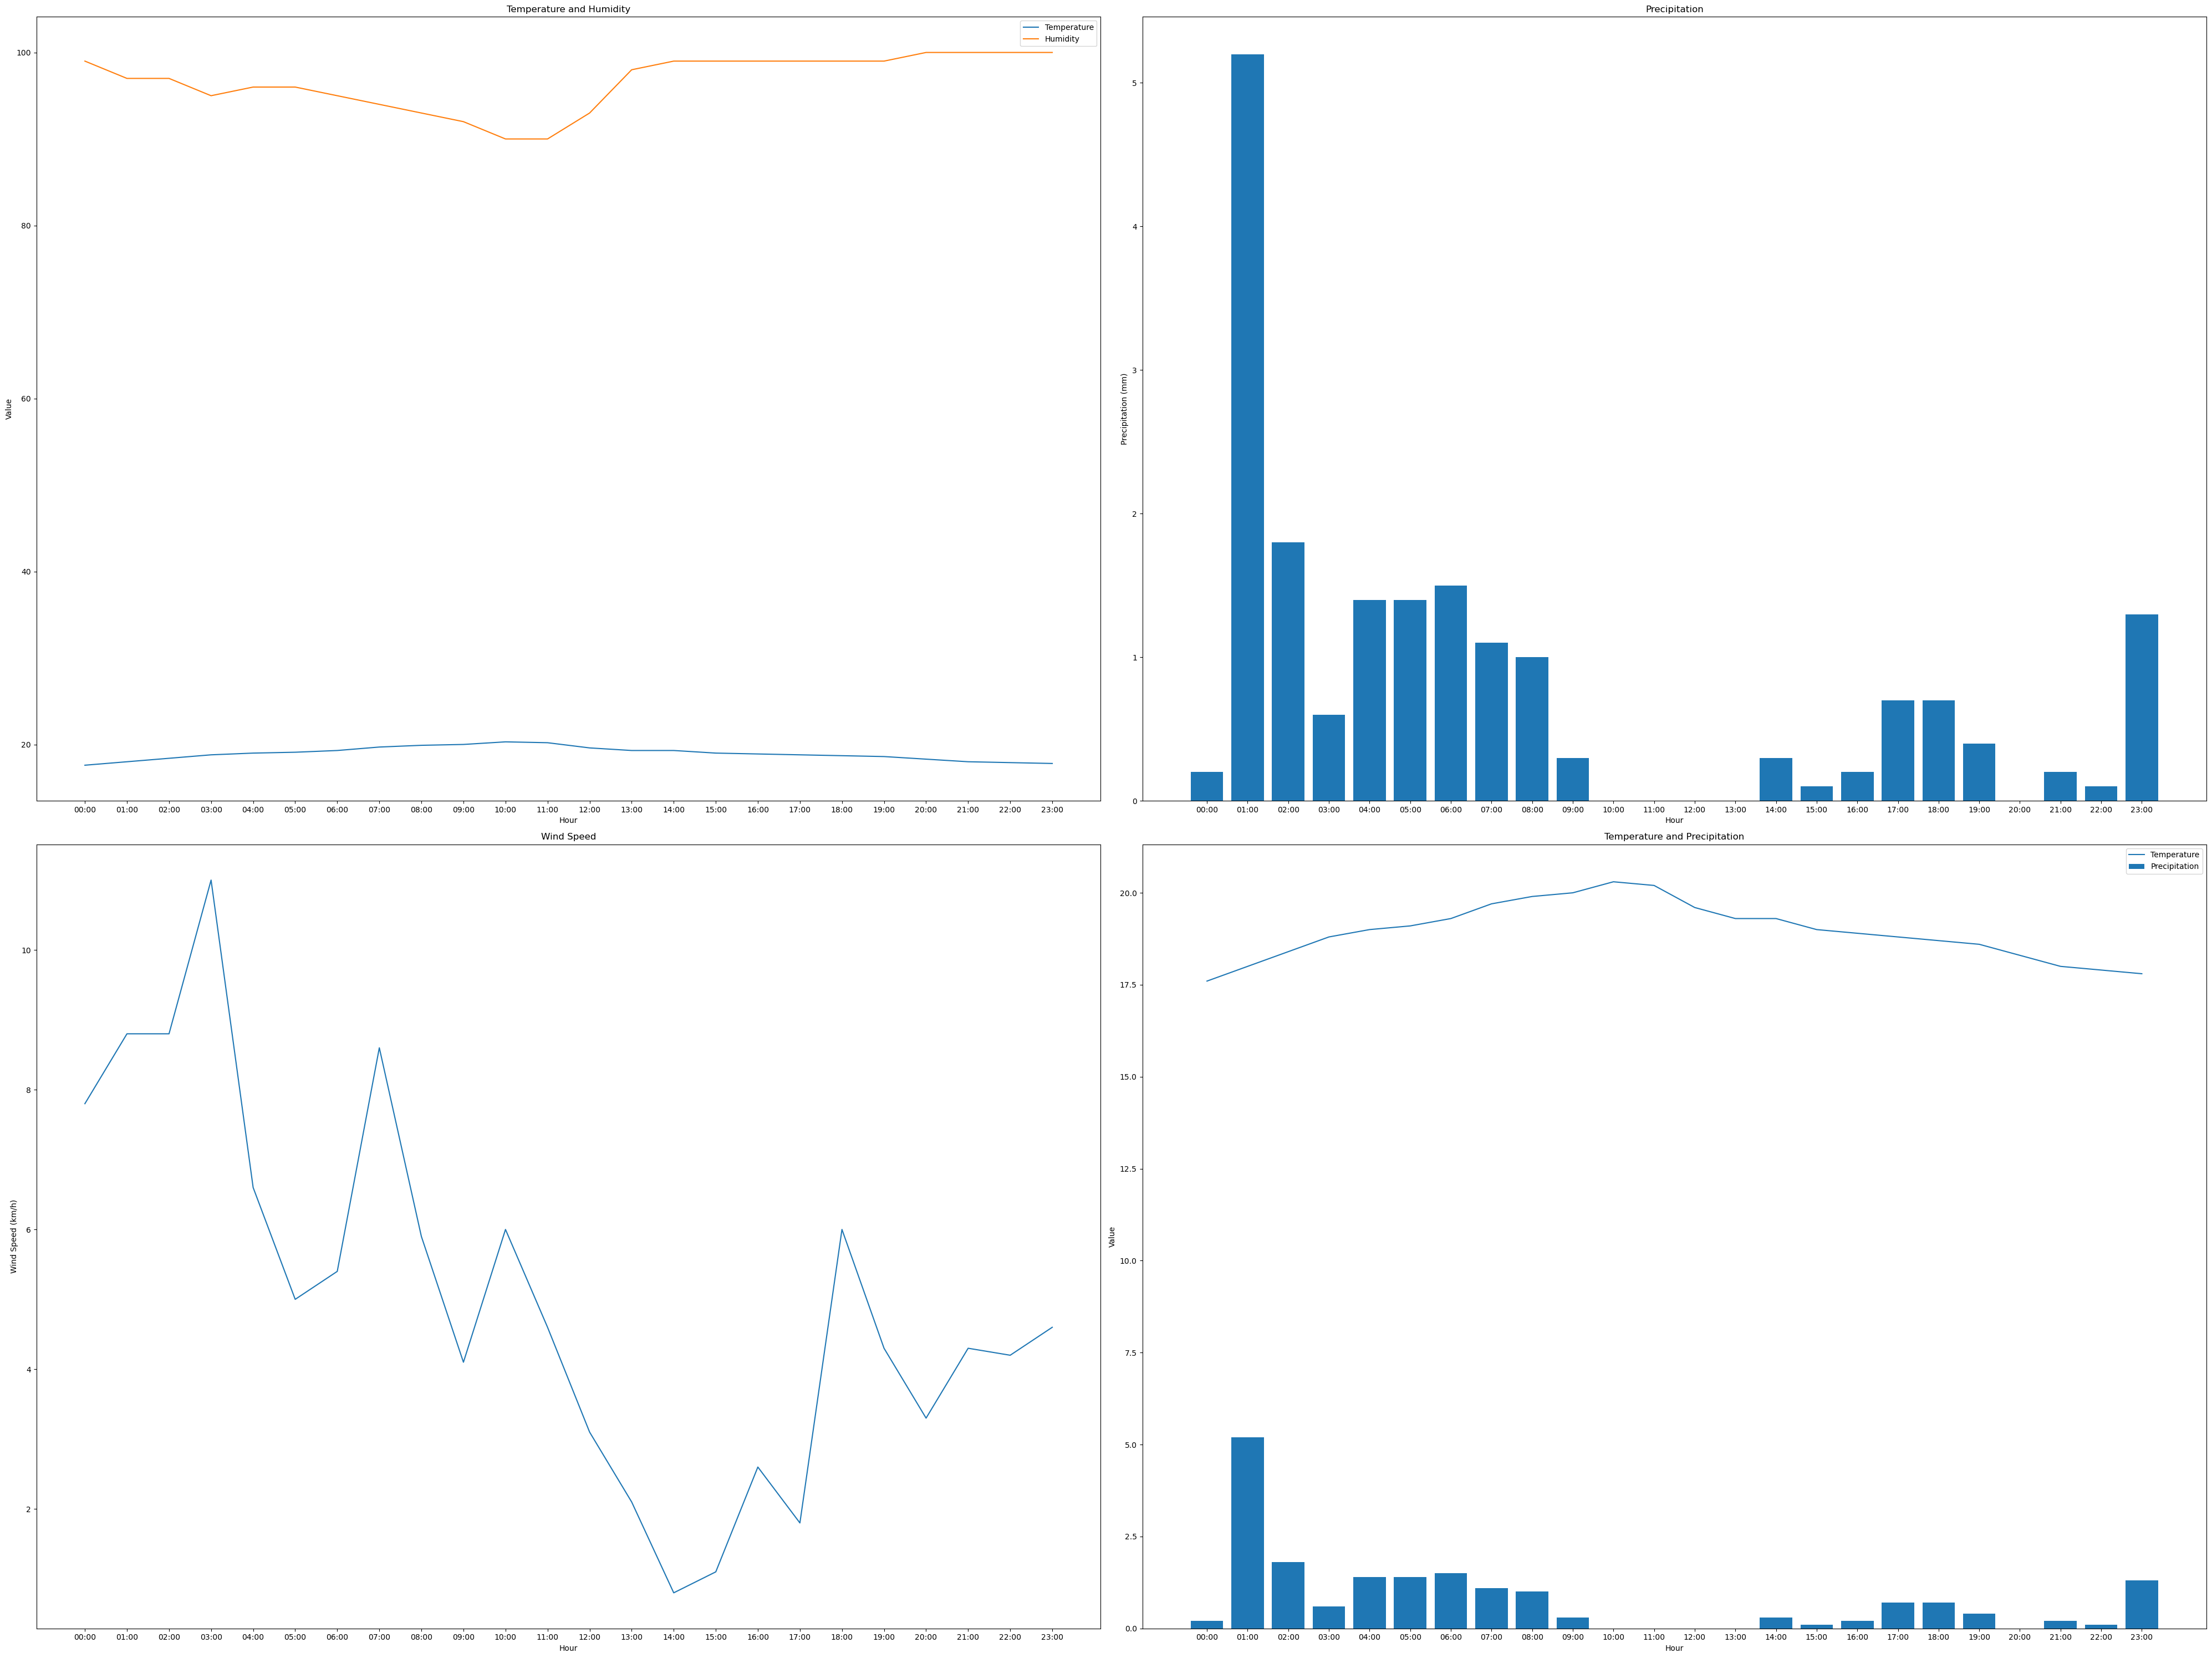

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(weather_data)

# Create a figure and axis
fig, ax = plt.subplots(2, 2, figsize=(40, 30))

# Plot temperature and humidity
ax[0, 0].plot(df['hour'], df['temperature_2m'], label='Temperature')
ax[0, 0].plot(df['hour'], df['relative_humidity_2m'], label='Humidity')
ax[0, 0].set_title('Temperature and Humidity')
ax[0, 0].set_xlabel('Hour')
ax[0, 0].set_ylabel('Value')
ax[0, 0].legend()

# Plot precipitation
ax[0, 1].bar(df['hour'], df['precipitation'])
ax[0, 1].set_title('Precipitation')
ax[0, 1].set_xlabel('Hour')
ax[0, 1].set_ylabel('Precipitation (mm)')

# Plot wind speed
ax[1, 0].plot(df['hour'], df['wind_speed_10m'])
ax[1, 0].set_title('Wind Speed')
ax[1, 0].set_xlabel('Hour')
ax[1, 0].set_ylabel('Wind Speed (km/h)')

# Plot temperature and precipitation together
ax[1, 1].plot(df['hour'], df['temperature_2m'], label='Temperature')
ax[1, 1].bar(df['hour'], df['precipitation'], label='Precipitation')
ax[1, 1].set_title('Temperature and Precipitation')
ax[1, 1].set_xlabel('Hour')
ax[1, 1].set_ylabel('Value')
ax[1, 1].legend()

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

In [117]:
weather_data.keys()
# print(weather_data)

dict_keys(['time', 'temperature_2m', 'relative_humidity_2m', 'dewpoint_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm', 'hour'])

Summary Statistics:
       temperature_2m  relative_humidity_2m  dewpoint_2m  \
count        24.00000             24.000000    24.000000   
mean         18.93750             96.625000    18.395833   
std           0.77393              3.200713     0.444756   
min          17.60000             90.000000    17.400000   
25%          18.37500             94.750000    18.075000   
50%          18.95000             97.500000    18.500000   
75%          19.37500             99.000000    18.700000   
max          20.30000            100.000000    19.100000   

       apparent_temperature  precipitation       rain  snowfall  snow_depth  \
count             24.000000      24.000000  24.000000      24.0        24.0   
mean              21.345833       0.770833   0.770833       0.0         0.0   
std                1.093053       1.101572   1.101572       0.0         0.0   
min               19.200000       0.000000   0.000000       0.0         0.0   
25%               20.275000       0.100000  

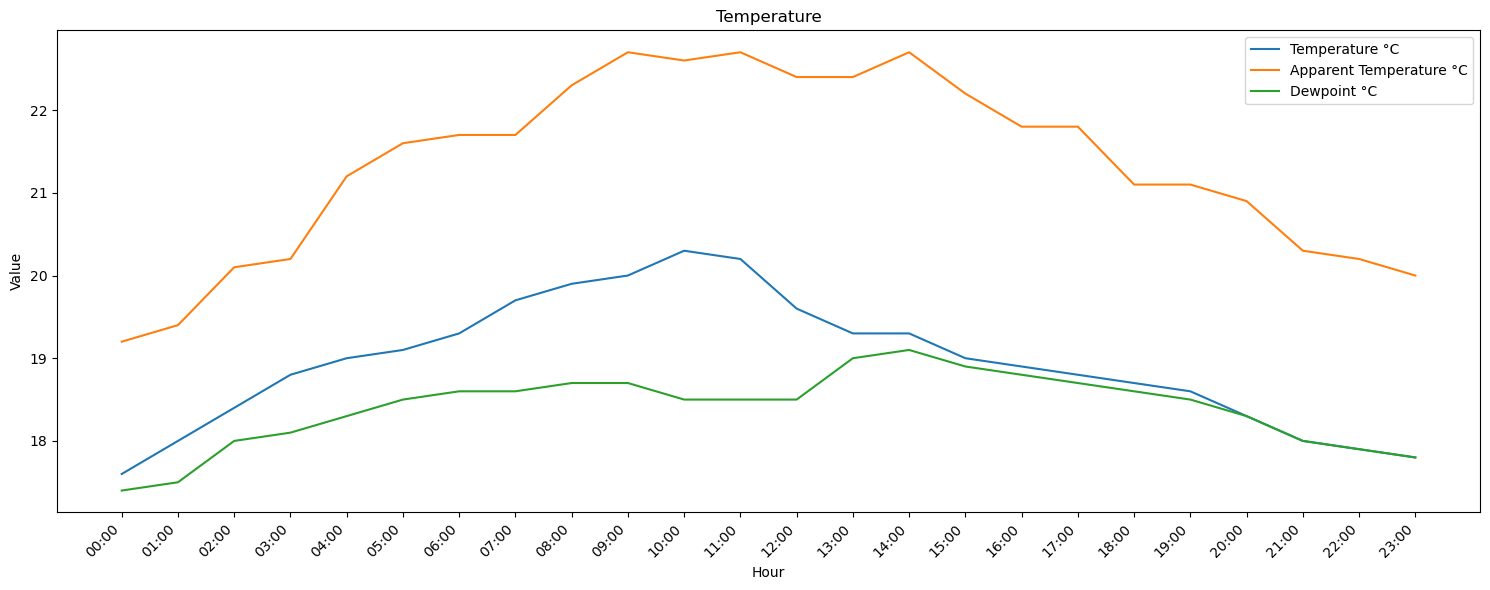

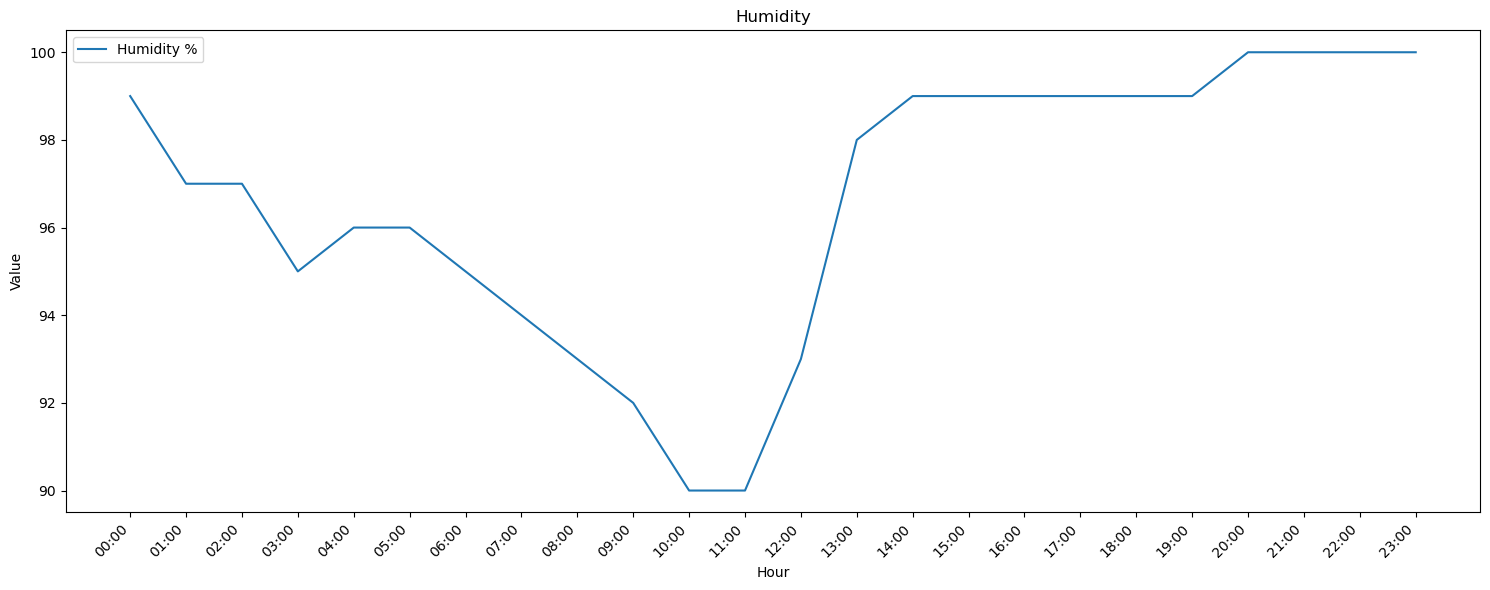

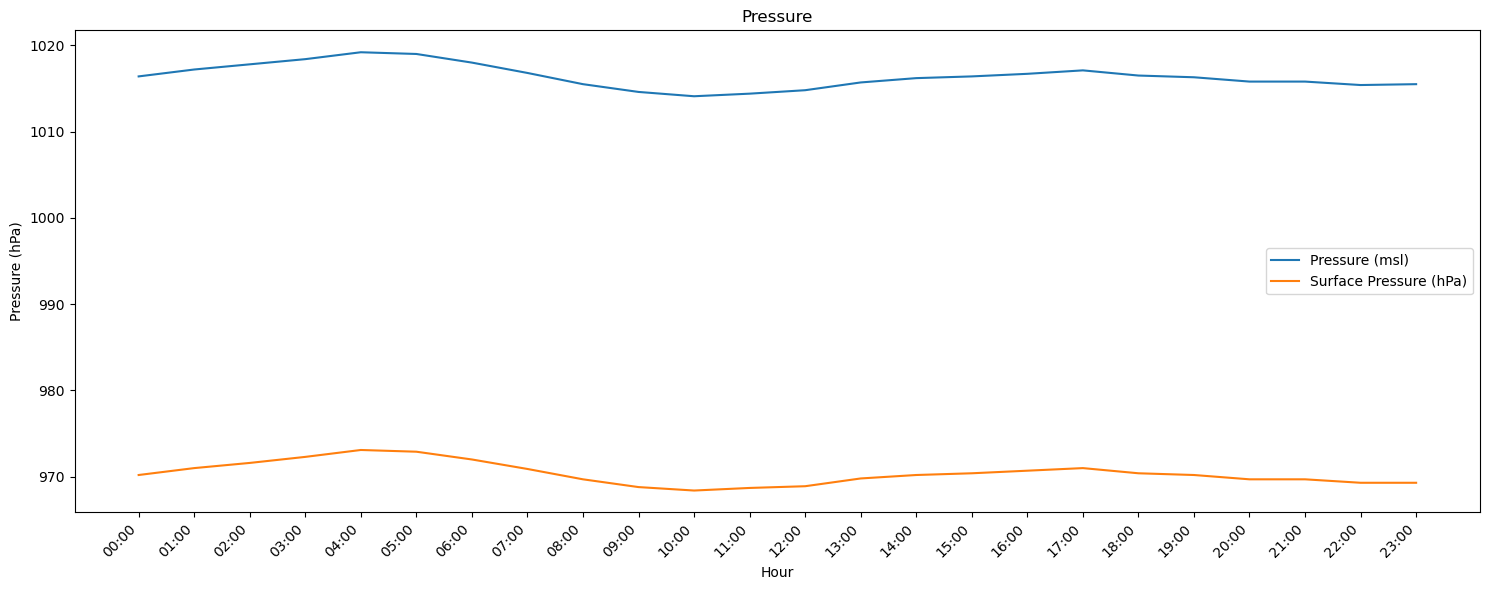

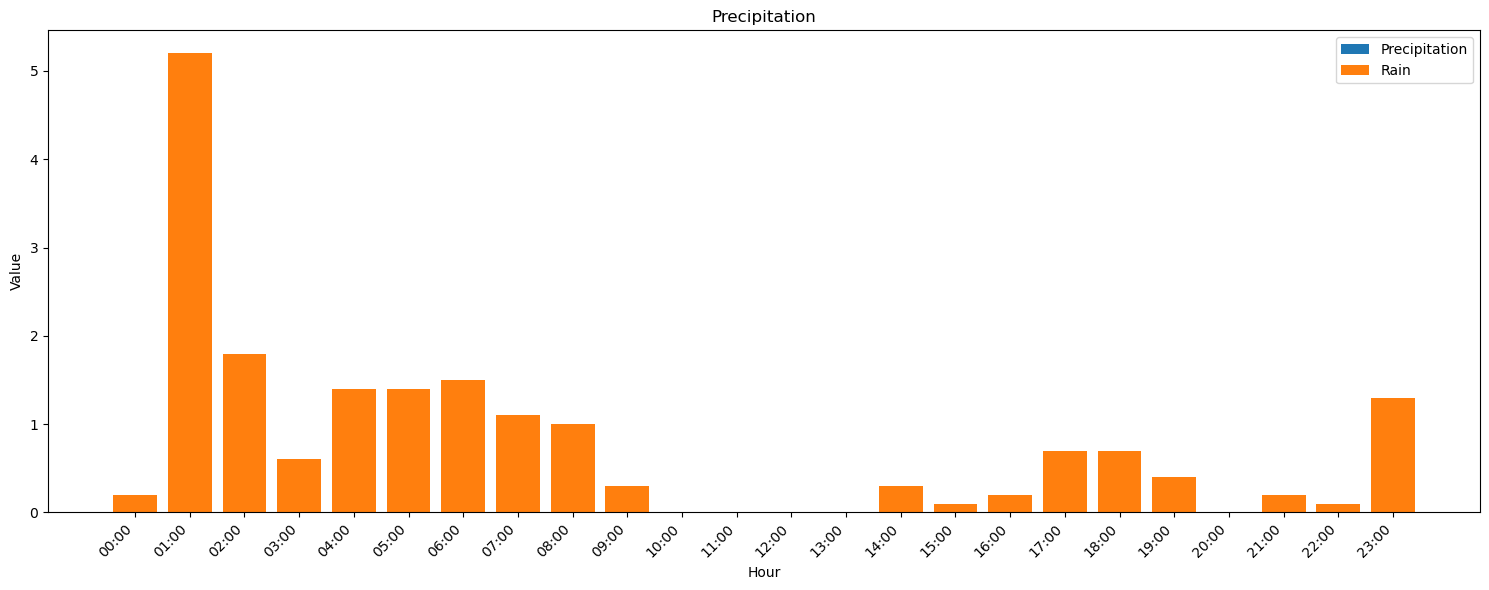

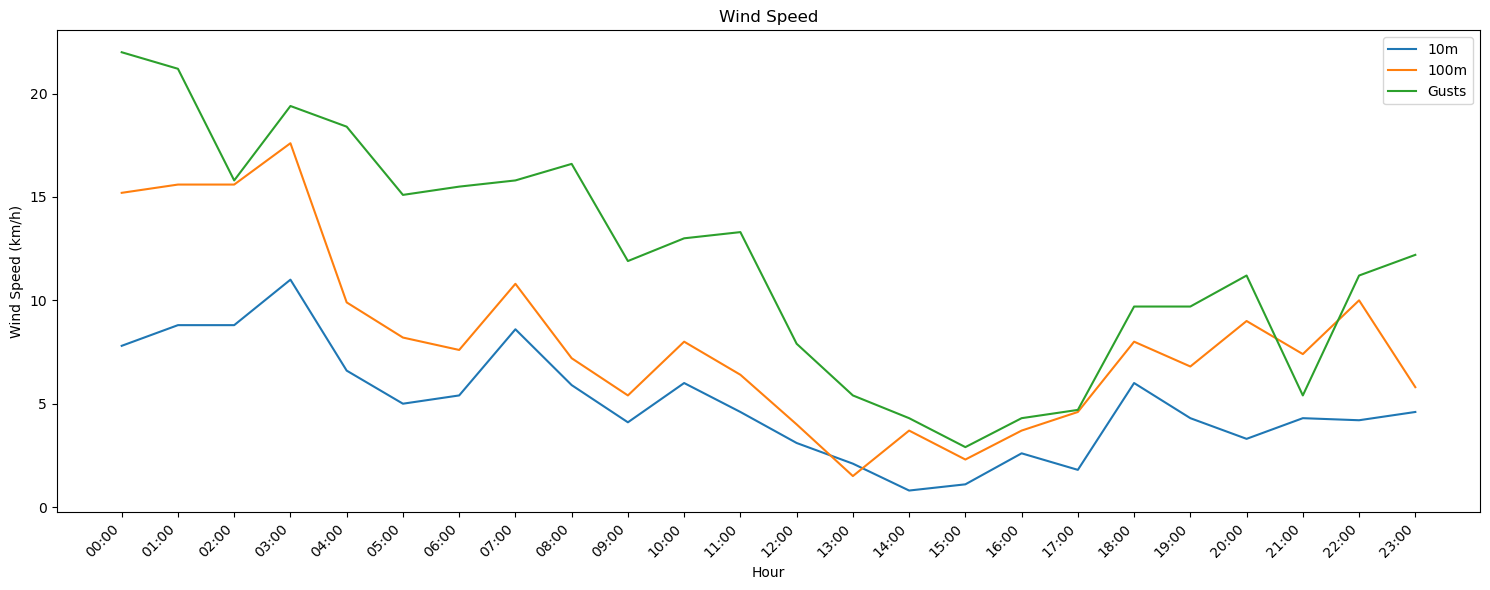

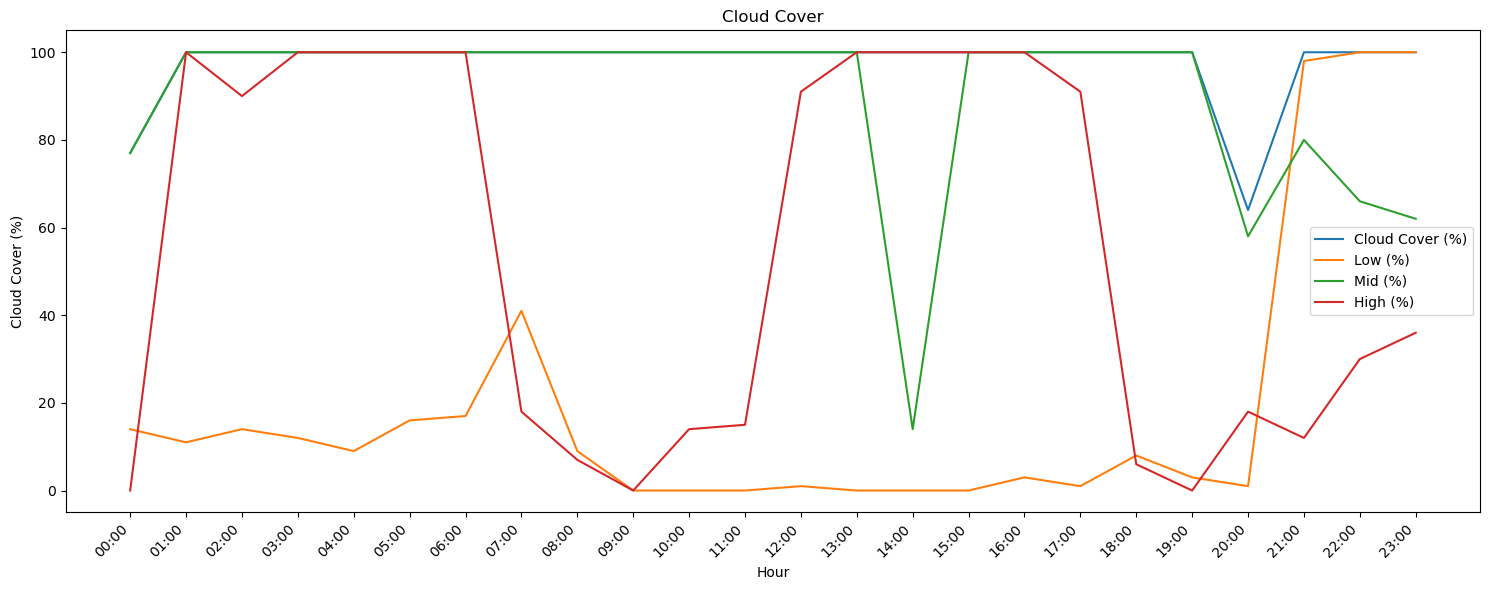

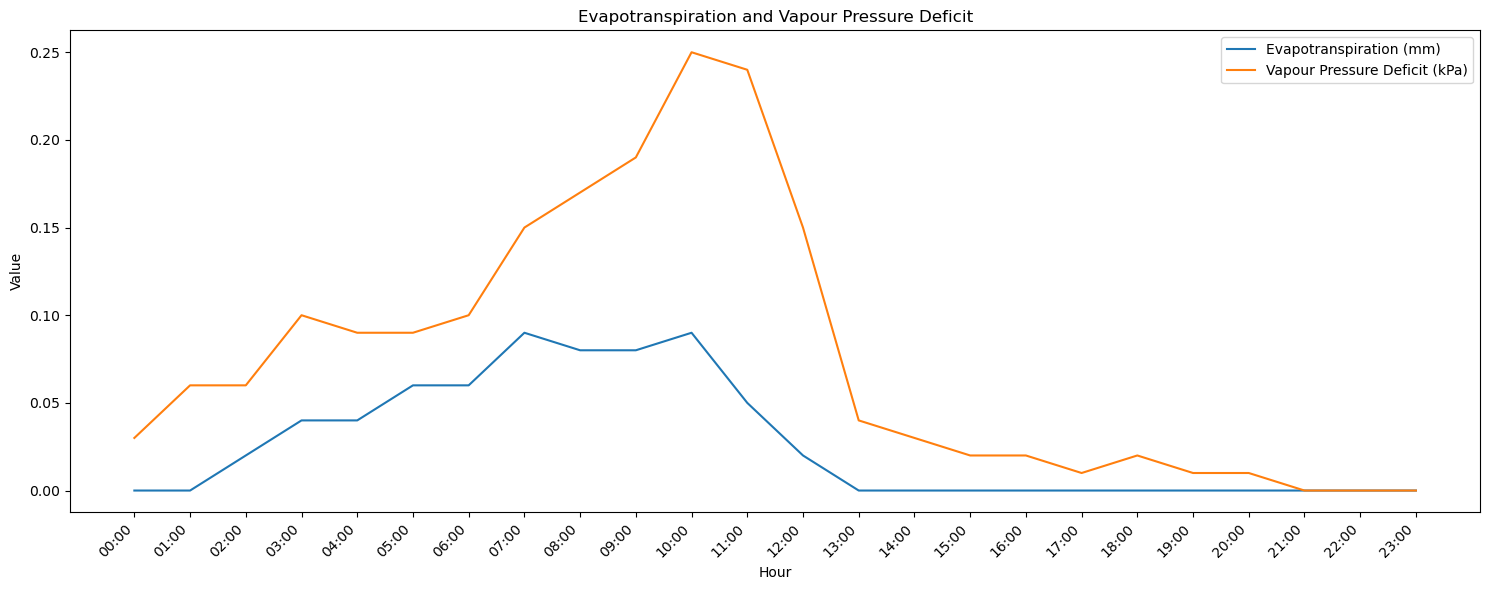

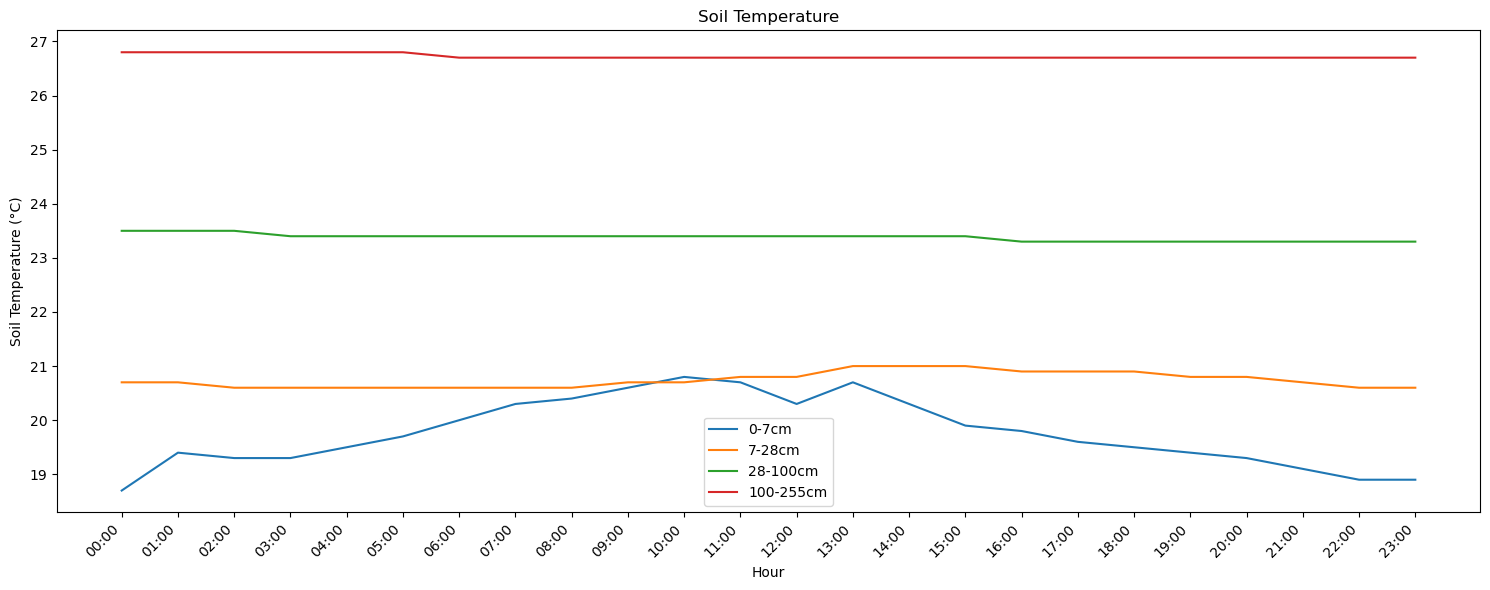

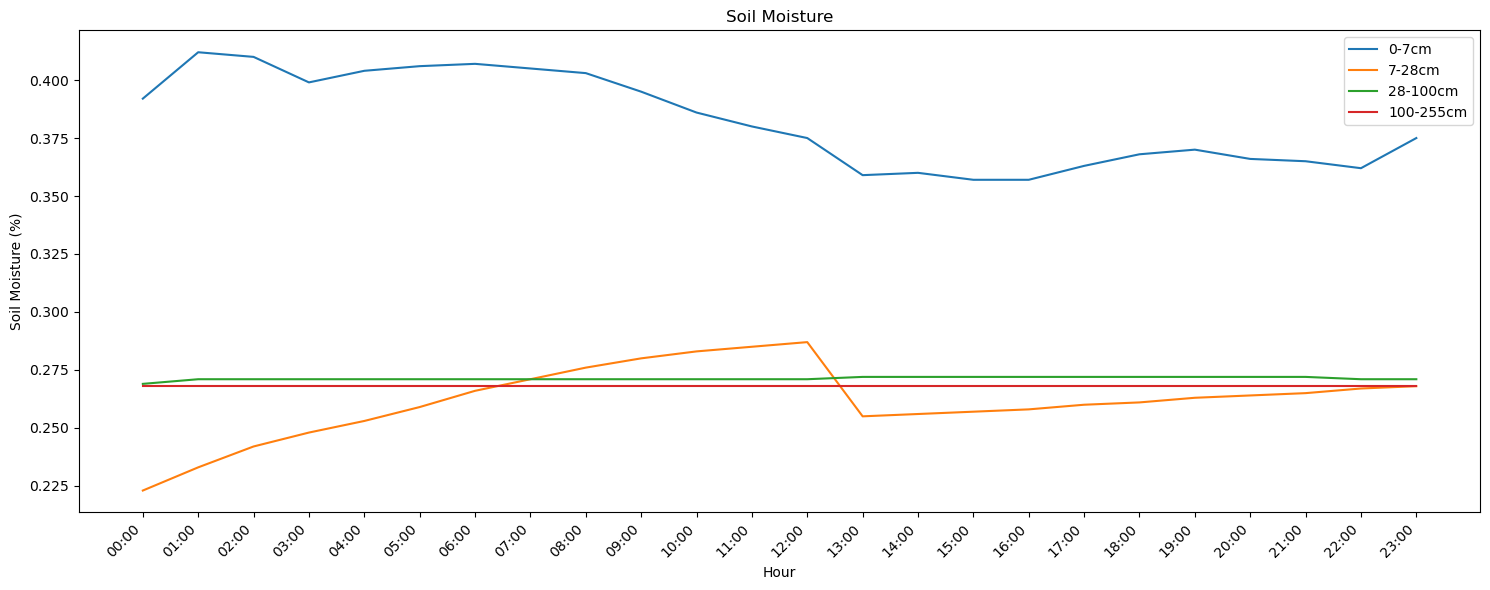

Correlation Matrix:
                               temperature_2m  relative_humidity_2m  \
temperature_2m                       1.000000             -0.831301   
relative_humidity_2m                -0.831301              1.000000   
dewpoint_2m                          0.709091             -0.205780   
apparent_temperature                 0.894226             -0.529257   
precipitation                       -0.268954              0.014027   
rain                                -0.268954              0.014027   
snowfall                                  NaN                   NaN   
snow_depth                                NaN                   NaN   
surface_pressure                    -0.205773              0.190072   
cloud_cover                          0.353070             -0.279937   
et0_fao_evapotranspiration           0.745189             -0.851341   
vapour_pressure_deficit              0.833892             -0.993230   
wind_speed_10m                      -0.148897            

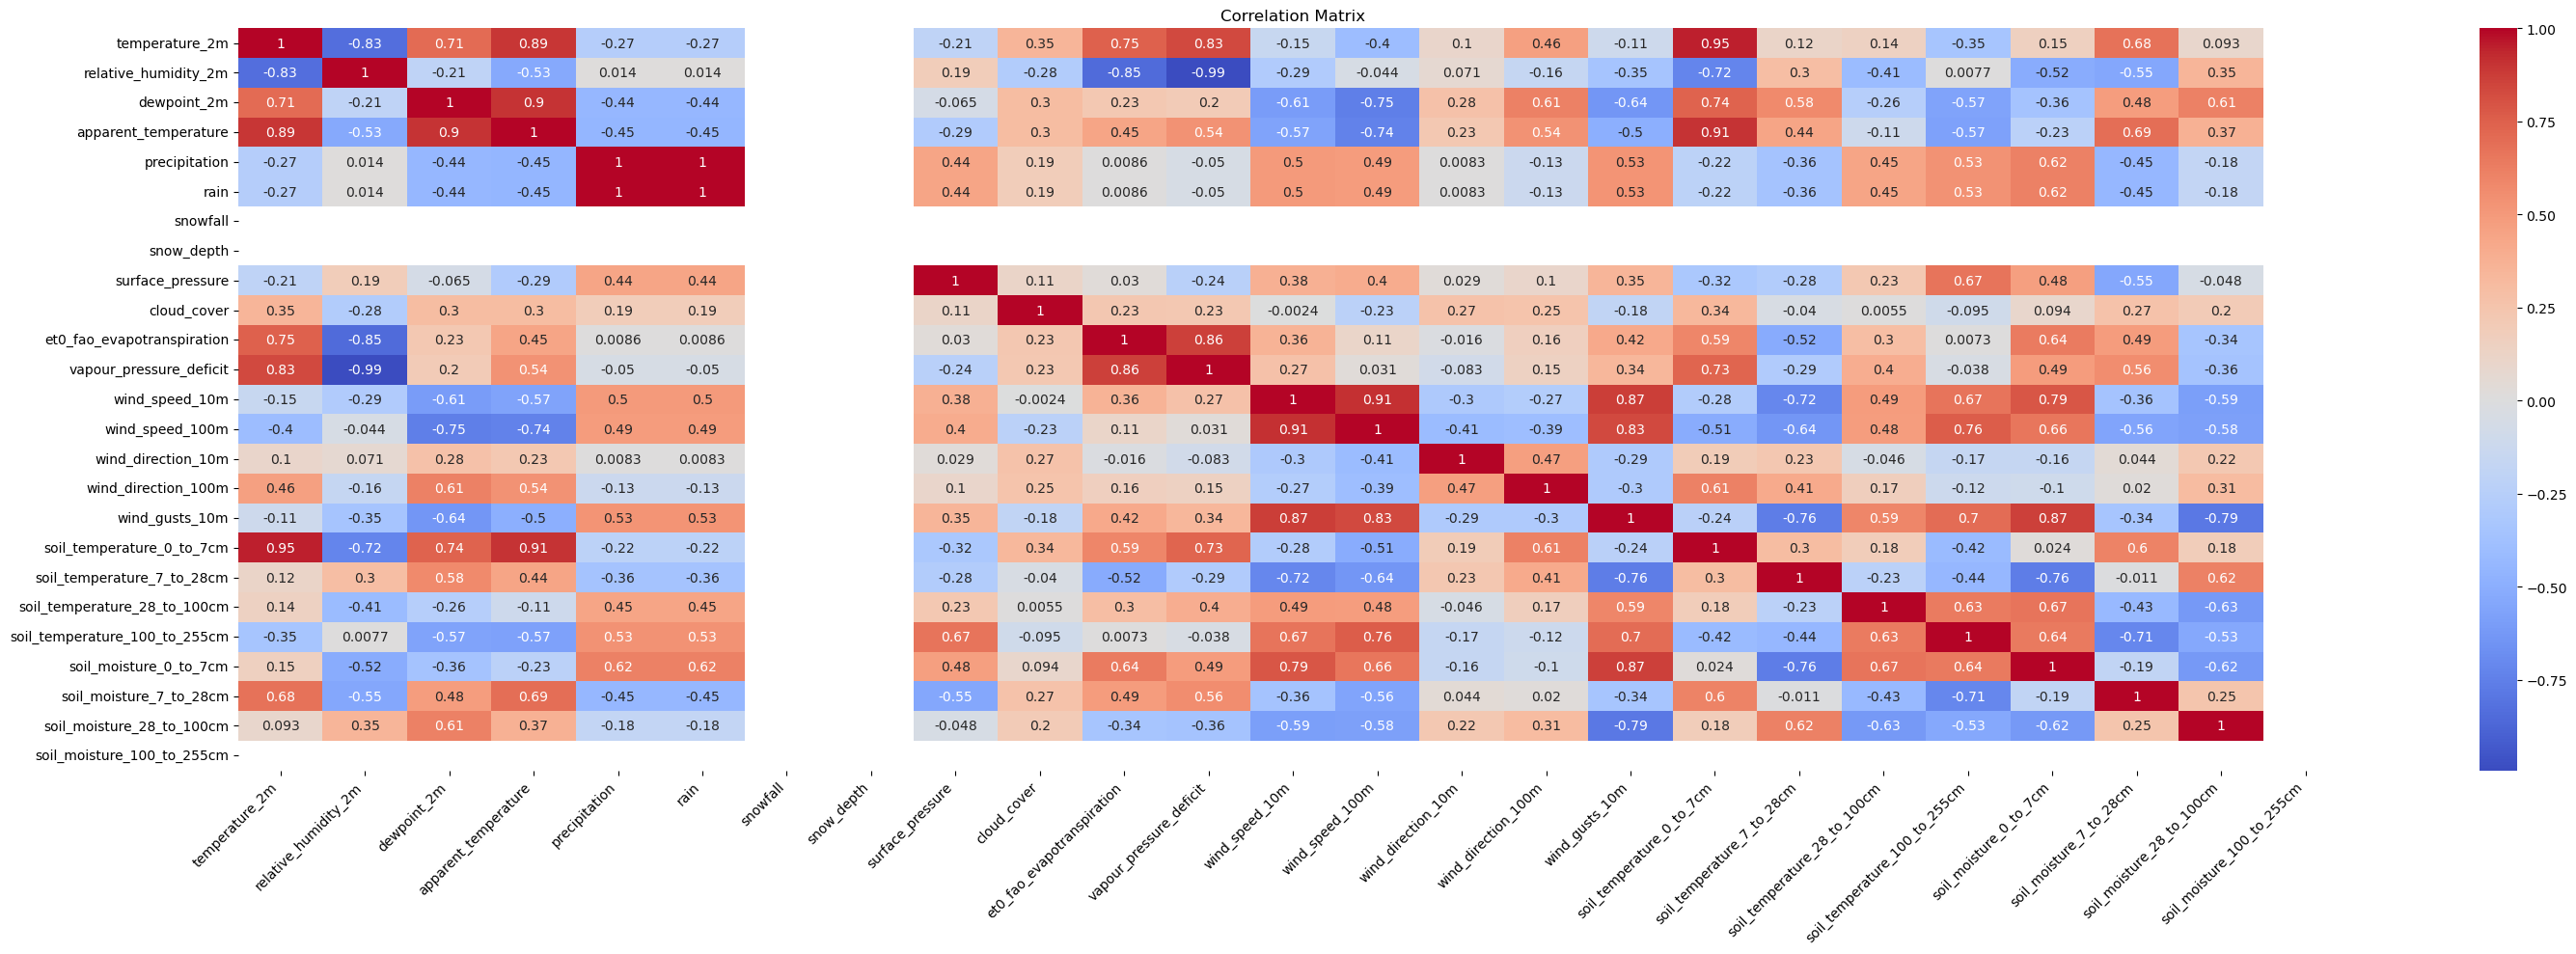

Regression Coefficients:
[ 9.00774386e-01  2.52366761e-02  1.02484579e-01 -4.39538725e-02
 -8.16133433e-04]
R-squared: 0.9675072396321898
Mean Squared Error: 0.016038426517551115


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

df = pd.DataFrame(weather_data)

# Calculate summary statistics
print("Summary Statistics:")
print(df.describe())

# Plot temperature
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['temperature_2m'], label='Temperature °C')
plt.plot(df['hour'], df['apparent_temperature'], label='Apparent Temperature °C')
plt.plot(df['hour'], df['dewpoint_2m'], label='Dewpoint °C')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Temperature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot humidity
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['relative_humidity_2m'], label='Humidity %')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Humidity')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot Pressure
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['pressure_msl'], label='Pressure (msl)')
plt.plot(df['hour'], df['surface_pressure'], label='Surface Pressure (hPa)')
plt.xlabel('Hour')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot precipitation
plt.figure(figsize=(15,6))
plt.bar(df['hour'], df['precipitation'], label='Precipitation')
plt.bar(df['hour'], df['rain'], label='Rain')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Precipitation')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot wind speed
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['wind_speed_10m'], label='10m')
plt.plot(df['hour'], df['wind_speed_100m'], label='100m')
plt.plot(df['hour'], df['wind_gusts_10m'], label='Gusts')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot cloud cover
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['cloud_cover'], label='Cloud Cover (%)')
plt.plot(df['hour'], df['cloud_cover_low'], label='Low (%)')
plt.plot(df['hour'], df['cloud_cover_mid'], label='Mid (%)')
plt.plot(df['hour'], df['cloud_cover_high'], label='High (%)')
plt.xlabel('Hour')
plt.ylabel('Cloud Cover (%)')
plt.title('Cloud Cover')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot evapotranspiration and vapour pressure deficit
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['et0_fao_evapotranspiration'], label='Evapotranspiration (mm)')
plt.plot(df['hour'], df['vapour_pressure_deficit'], label='Vapour Pressure Deficit (kPa)')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Evapotranspiration and Vapour Pressure Deficit')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot soil temperature
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['soil_temperature_0_to_7cm'], label='0-7cm')
plt.plot(df['hour'], df['soil_temperature_7_to_28cm'], label='7-28cm')
plt.plot(df['hour'], df['soil_temperature_28_to_100cm'], label='28-100cm')
plt.plot(df['hour'], df['soil_temperature_100_to_255cm'], label='100-255cm')
plt.xlabel('Hour')
plt.ylabel('Soil Temperature (°C)')
plt.title('Soil Temperature')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Plot soil moisture
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['soil_moisture_0_to_7cm'], label='0-7cm')
plt.plot(df['hour'], df['soil_moisture_7_to_28cm'], label='7-28cm')
plt.plot(df['hour'], df['soil_moisture_28_to_100cm'], label='28-100cm')
plt.plot(df['hour'], df['soil_moisture_100_to_255cm'], label='100-255cm')
plt.xlabel('Hour')
plt.ylabel('Soil Moisture (%)')
plt.title('Soil Moisture')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Correlation analysis
corr_matrix = df[['temperature_2m', 'relative_humidity_2m', 'dewpoint_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'surface_pressure', 'cloud_cover', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Regression analysis
X = df[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'cloud_cover']]
y = df['soil_temperature_0_to_7cm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regression Coefficients:")
print(model.coef_)
print("R-squared:", model.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

In [77]:
# Calculate the average temperature, relative humidity, and precipitation
avg_temperature = df['temperature_2m'].mean()
avg_relative_humidity = df['relative_humidity_2m'].mean()
avg_precipitation = df['precipitation'].mean()

print(f'Average Temperature: {avg_temperature}°C')
print(f'Average Relative Humidity: {avg_relative_humidity}%')
print(f'Average Precipitation: {avg_precipitation}mm')

# Find the maximum and minimum temperature, relative humidity, and precipitation
max_temperature = df['temperature_2m'].max()
min_temperature = df['temperature_2m'].min()
max_relative_humidity = df['relative_humidity_2m'].max()
min_relative_humidity = df['relative_humidity_2m'].min()
max_precipitation = df['precipitation'].max()
min_precipitation = df['precipitation'].min()

print(f'Maximum Temperature: {max_temperature}°C')
print(f'Minimum Temperature: {min_temperature}°C')
print(f'Maximum Relative Humidity: {max_relative_humidity}%')
print(f'Minimum Relative Humidity: {min_relative_humidity}%')
print(f'Maximum Precipitation: {max_precipitation}mm')
print(f'Minimum Precipitation: {min_precipitation}mm')

Average Temperature: 18.9375°C
Average Relative Humidity: 96.625%
Average Precipitation: 0.7708333333333334mm
Maximum Temperature: 20.3°C
Minimum Temperature: 17.6°C
Maximum Relative Humidity: 100%
Minimum Relative Humidity: 90%
Maximum Precipitation: 5.2mm
Minimum Precipitation: 0.0mm


### Daily

In [132]:
import ast
weather_data = {}

# Read the CSV file
file_path = 'Data/Daily/24.217924-82.62766;2023-12-01-2023-12-31.csv'

# Read the CSV file
with open(f'{file_path}', 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip the header
    
    # Loop through each row
    for row in reader:
        variable_name = row[0]
        values_str = row[-1]  # The last column contains the data array as a string
        values_list = ast.literal_eval(values_str)  # Convert string to list
        
        # Add to dictionary
        weather_data[variable_name] = values_list
weather_data['date'] = weather_data['time']
del weather_data['time']

In [128]:
print(f"sunrise: {weather_data['sunrise'][:5]}, sunset: {weather_data['sunset'][:5]}, daylight_duration: {weather_data['daylight_duration'][:5]}, sunshine_duration: {weather_data['sunshine_duration'][:5]}")

sunrise: ['2023-12-01T00:55', '2023-12-02T00:56', '2023-12-03T00:57', '2023-12-04T00:57', '2023-12-05T00:58'], sunset: ['2023-12-01T11:40', '2023-12-02T11:40', '2023-12-03T11:41', '2023-12-04T11:41', '2023-12-05T11:41'], daylight_duration: [38702.7, 38665.0, 38629.33, 38595.7, 38563.7], sunshine_duration: [447.33, 18251.59, 26146.77, 33448.89, 5675.98]


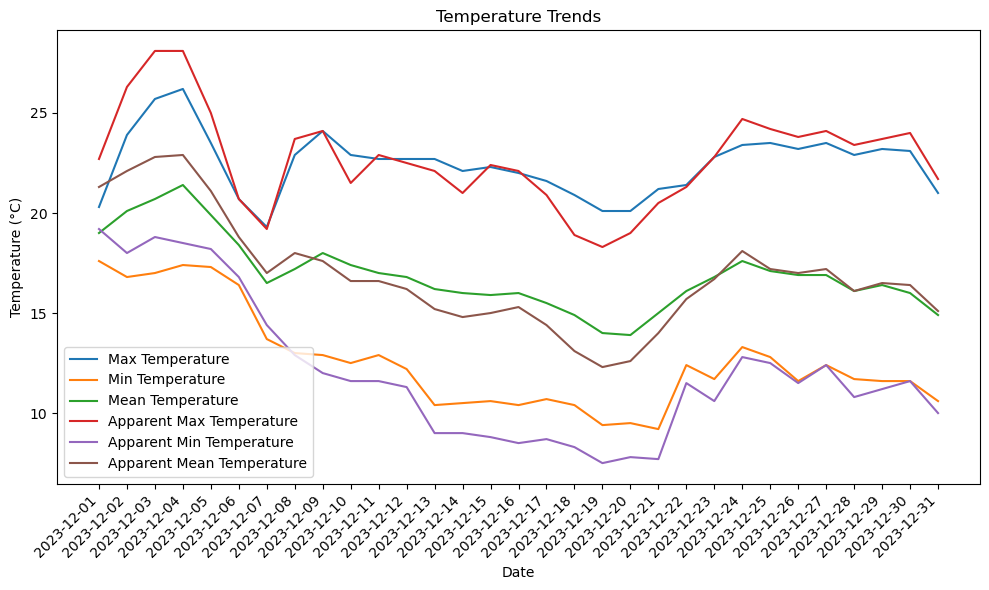

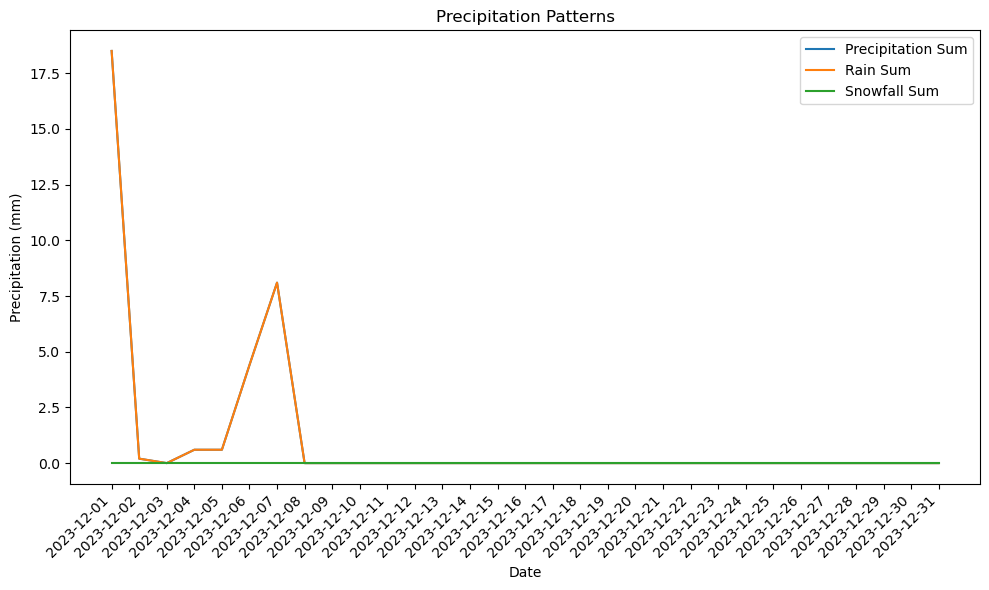

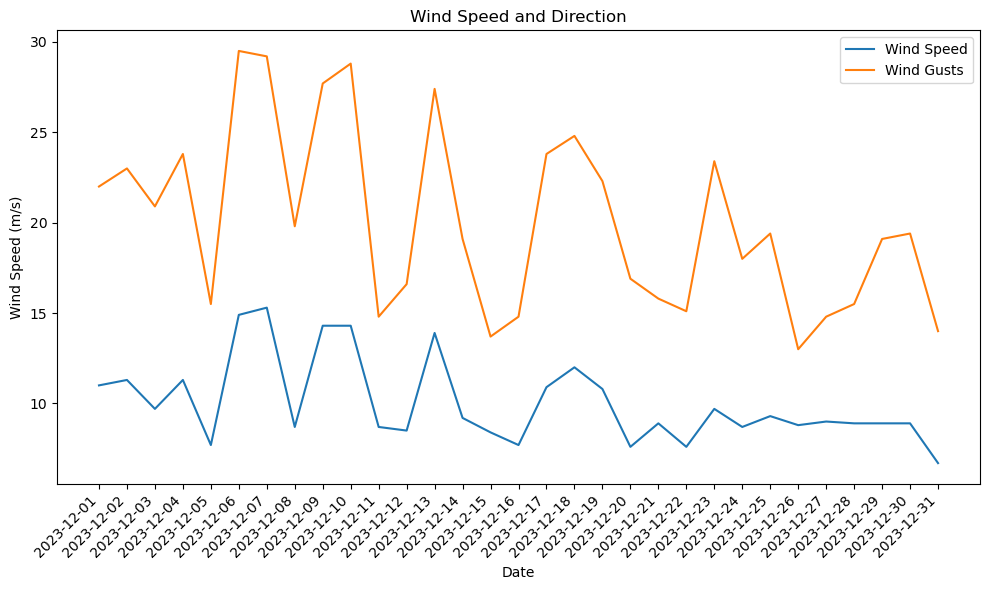

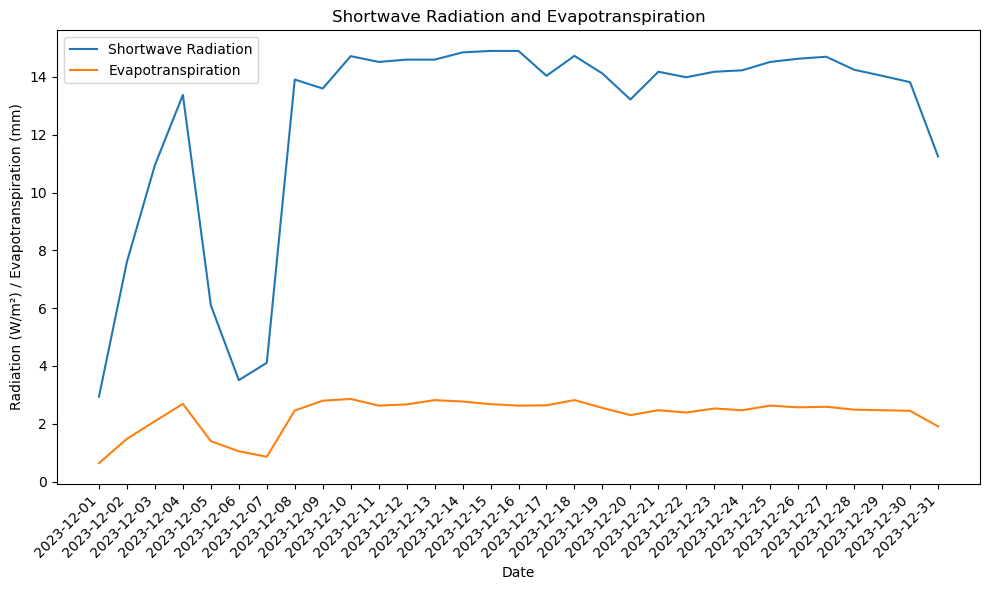

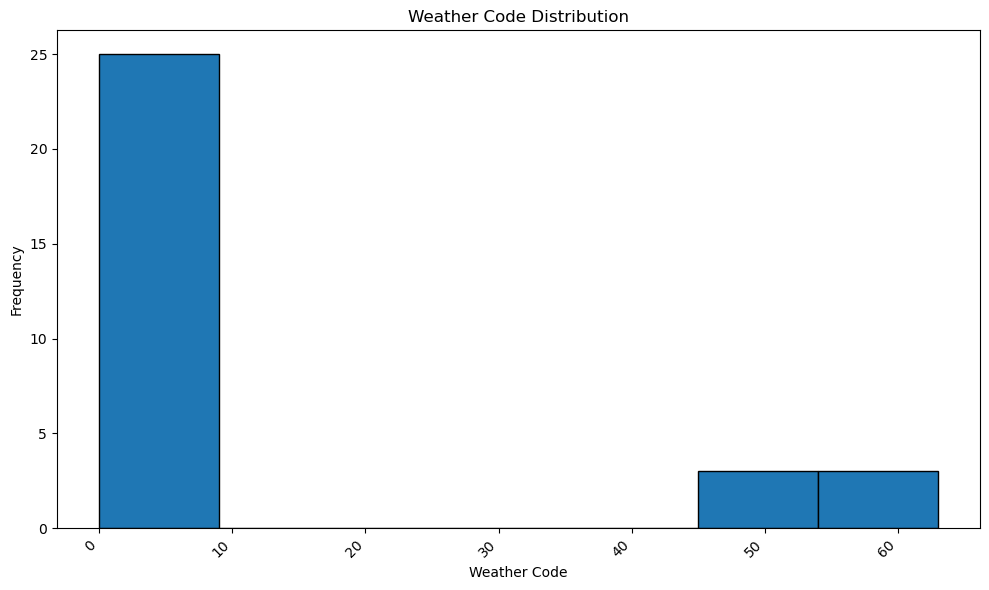

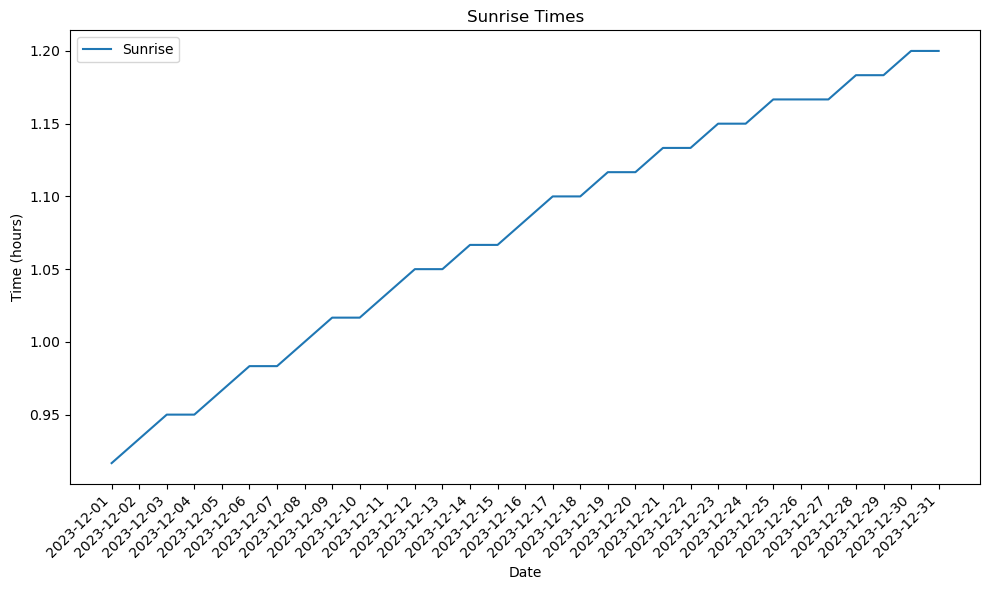

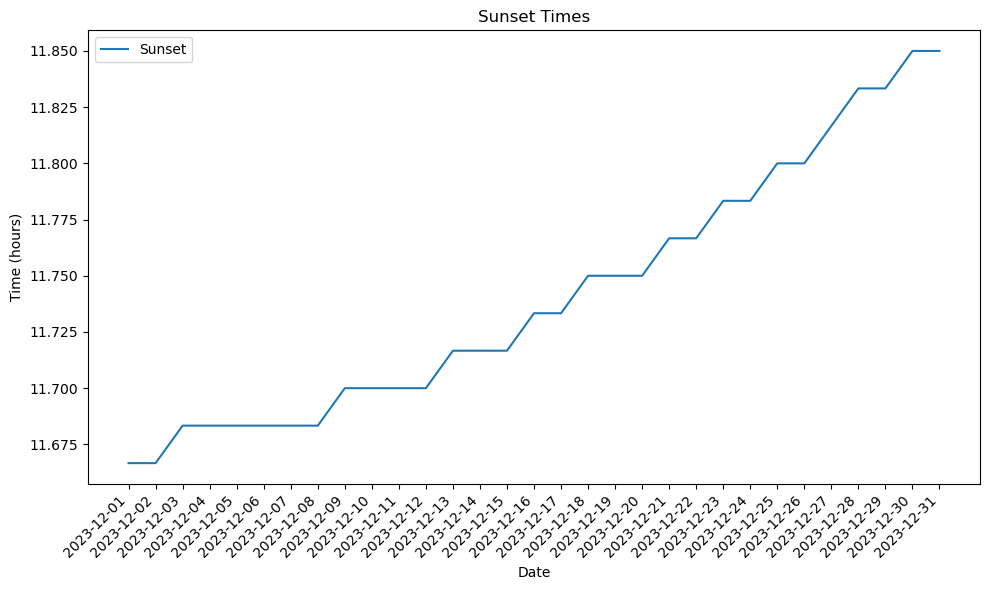

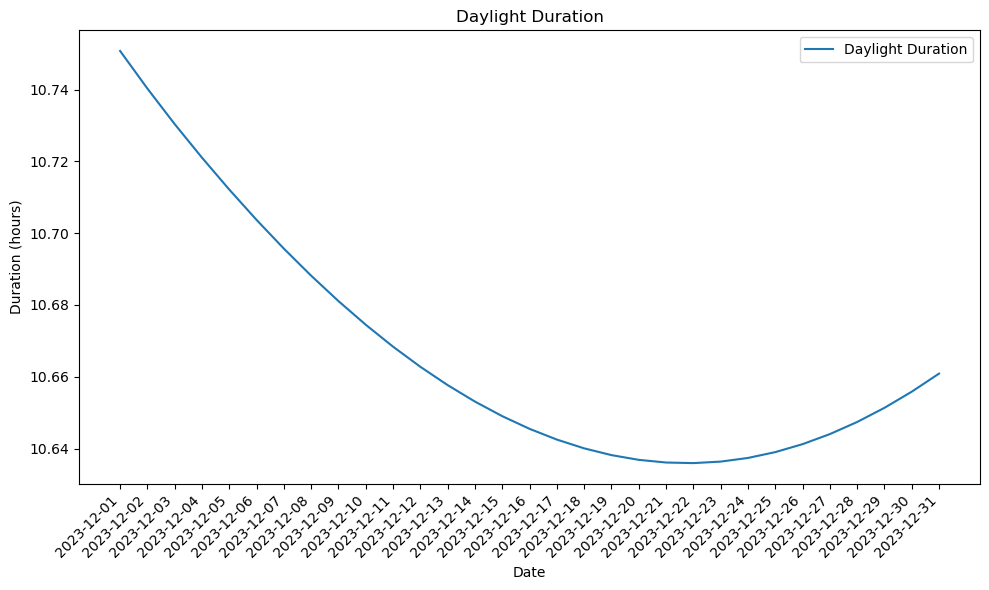

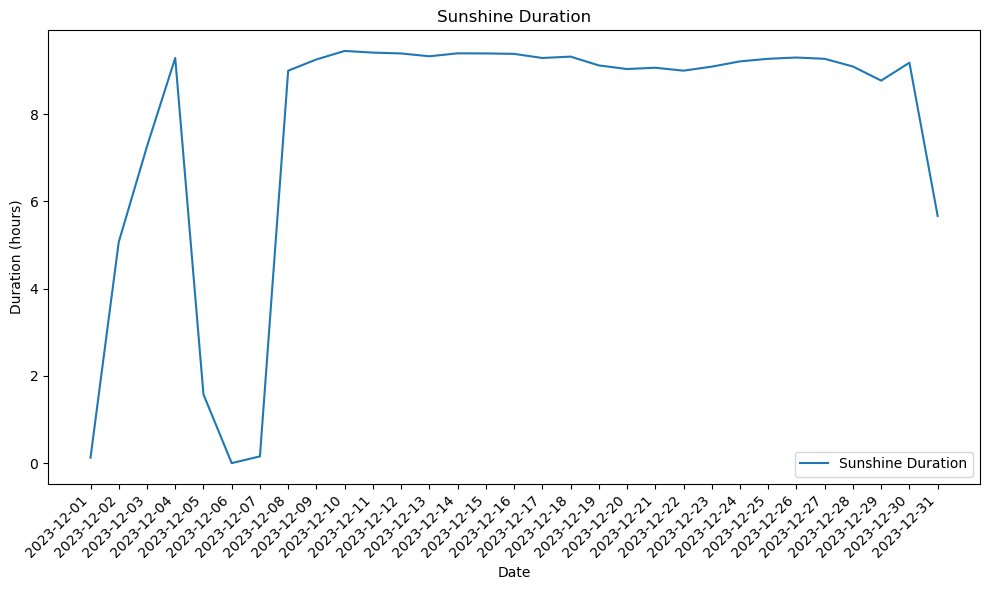

In [121]:
df = pd.DataFrame(weather_data)

# Plot temperature trends
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temperature_2m_max'], label='Max Temperature')
plt.plot(df['date'], df['temperature_2m_min'], label='Min Temperature')
plt.plot(df['date'], df['temperature_2m_mean'], label='Mean Temperature')
plt.plot(df['date'], df['apparent_temperature_max'], label='Apparent Max Temperature')
plt.plot(df['date'], df['apparent_temperature_min'], label='Apparent Min Temperature')
plt.plot(df['date'], df['apparent_temperature_mean'], label='Apparent Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot precipitation patterns
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['precipitation_sum'], label='Precipitation Sum')
plt.plot(df['date'], df['rain_sum'], label='Rain Sum')
plt.plot(df['date'], df['snowfall_sum'], label='Snowfall Sum')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Patterns')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot wind speed and direction
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['wind_speed_10m_max'], label='Wind Speed')
plt.plot(df['date'], df['wind_gusts_10m_max'], label='Wind Gusts')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed and Direction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot shortwave radiation and evapotranspiration
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['shortwave_radiation_sum'], label='Shortwave Radiation')
plt.plot(df['date'], df['et0_fao_evapotranspiration'], label='Evapotranspiration')
plt.xlabel('Date')
plt.ylabel('Radiation (W/m²) / Evapotranspiration (mm)')
plt.title('Shortwave Radiation and Evapotranspiration')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot weather code distribution
plt.figure(figsize=(10, 6))
plt.hist(df['weather_code'], bins=7, edgecolor='black')
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.title('Weather Code Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Convert sunrise and sunset times to hours
df['sunrise_hour'] = pd.to_datetime(df['sunrise']).dt.hour + pd.to_datetime(df['sunrise']).dt.minute / 60
df['sunset_hour'] = pd.to_datetime(df['sunset']).dt.hour + pd.to_datetime(df['sunset']).dt.minute / 60

# Plot sunrise times
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sunrise_hour'], label='Sunrise')
plt.xlabel('Date')
plt.ylabel('Time (GMT+0)')
plt.title('Sunrise Times')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot sunset times
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sunset_hour'], label='Sunset')
plt.xlabel('Date')
plt.ylabel('Time (GMT+0)')
plt.title('Sunset Times')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot daylight duration
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['daylight_duration'] / 3600, label='Daylight Duration')
plt.xlabel('Date')
plt.ylabel('Duration (hours)')
plt.title('Daylight Duration')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()

# Plot sunshine duration
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sunshine_duration'] / 3600, label='Sunshine Duration')
plt.xlabel('Date')
plt.ylabel('Duration (hours)')
plt.title('Sunshine Duration')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.show()


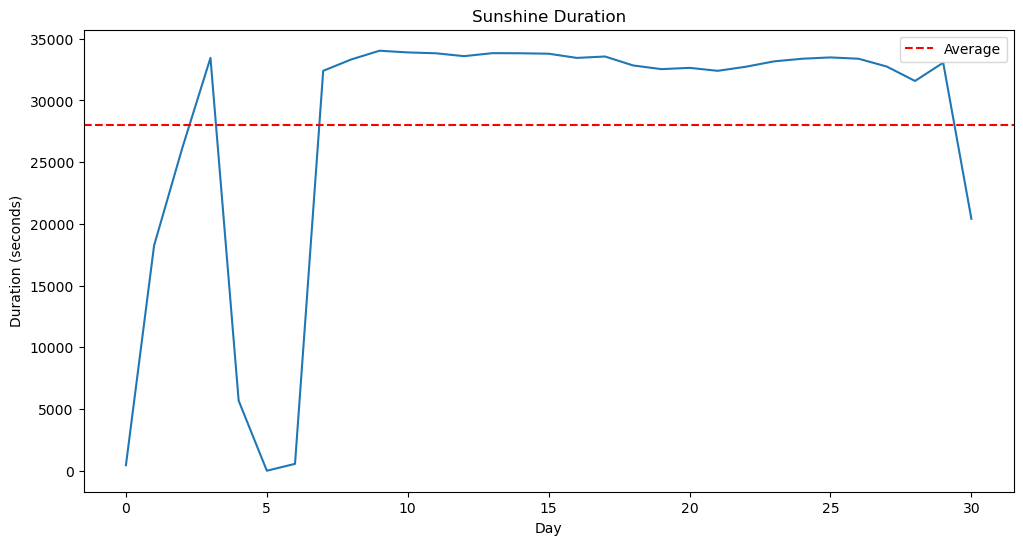

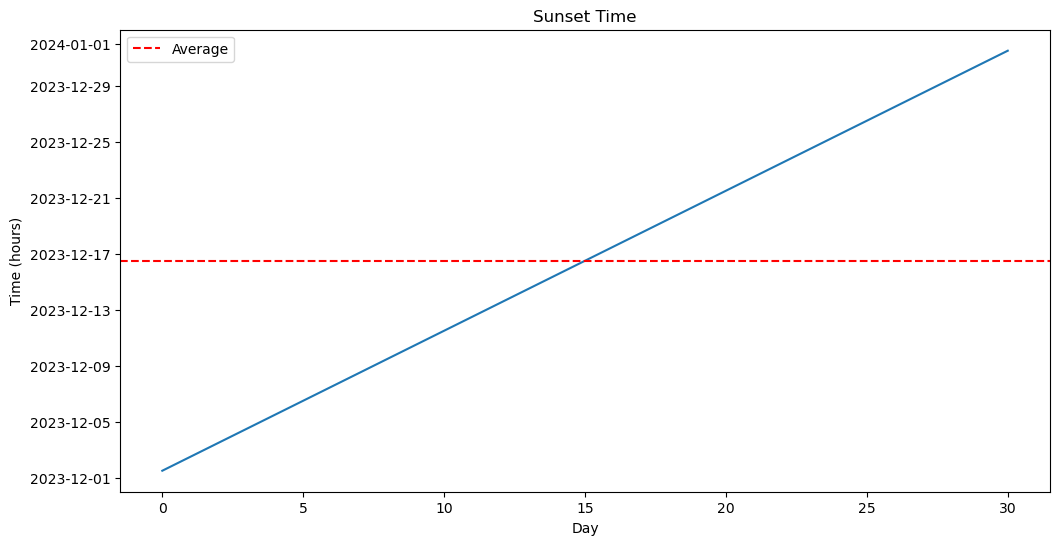

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


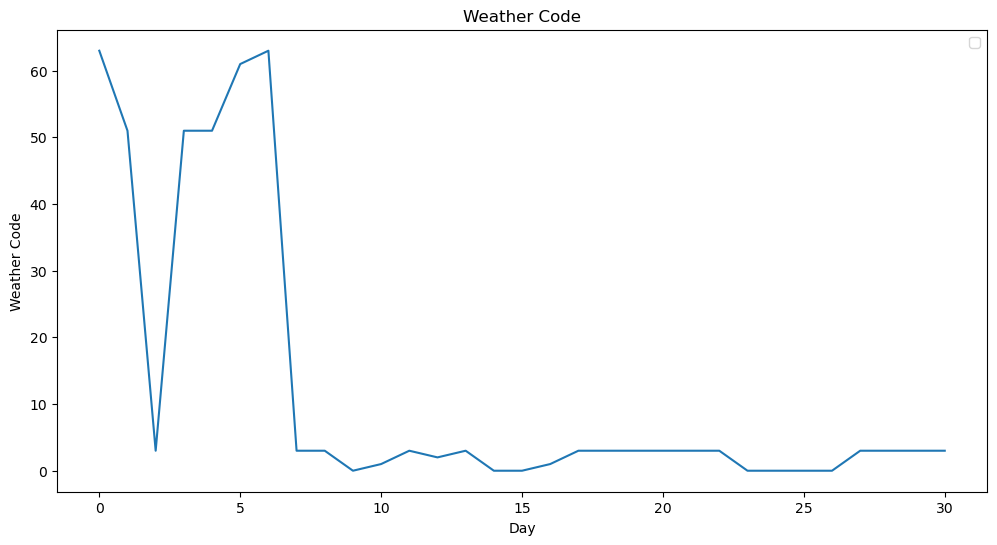

In [136]:
# Plot sunshine duration
plt.figure(figsize=(12, 6))
plt.plot(df['sunshine_duration'])
plt.title('Sunshine Duration')
plt.xlabel('Day')
plt.ylabel('Duration (seconds)')
plt.axhline(y=df['sunshine_duration'].mean(), color='r', linestyle='--', label='Average')
plt.legend()
plt.show()


# Plot sunset time
plt.figure(figsize=(12, 6))
plt.plot(df['sunset'])
plt.title('Sunset Time')
plt.xlabel('Day')
plt.ylabel('Time (hours)')
plt.axhline(y=df['sunset'].mean(), color='r', linestyle='--', label='Average')
plt.legend()
plt.show()

# Plot weather code
plt.figure(figsize=(12, 6))
plt.plot(df['weather_code'])
plt.title('Weather Code')
plt.xlabel('Day')
plt.ylabel('Weather Code')
plt.legend()
plt.show()

In [ ]:
# Correlation analysis
corr_matrix = df[["temperature_2m_max",
        "temperature_2m_min",
        "temperature_2m_mean",
        "apparent_temperature_max",
        "apparent_temperature_min",
        "apparent_temperature_mean",
        "sunrise",
        "sunset",
        "daylight_duration",
        "sunshine_duration",
        "precipitation_sum",
        "rain_sum",
        "snowfall_sum",
        "precipitation_hours",
        "wind_speed_10m_max",
        "wind_gusts_10m_max",
        "wind_direction_10m_dominant",
        "shortwave_radiation_sum",
        "et0_fao_evapotranspiration"]].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [196]:
    log = pd.read_csv(os.path.join("Data", "log.csv"))
    row = None
    # Debugging
    for i in log.iterrows():
        print(type(i[1]))
        row = i[1]
    print(type(row))
    print(log['start-time'][1] < '2023-12-12', log['end-time'][1] > '2023-11-15')

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
True True


In [ ]:
def extract_required_data(latitude, longitude, start_date, end_date, frequency):
    log = pd.read_csv(os.path.join("Data", "log.csv"))
    match = log[
        (log['latitude'] == latitude) &
        (log['longitude'] == longitude) &
        (log['type'] == frequency) &
        (log['start-time'] <= start_date) &
        (log['end-time'] >= end_date)
    ]

    if match.empty:
        raise ValueError("No matching entry found in log")

    row = match.iloc[0]
    data = pd.read_csv(row['file-path'])

    if row['start-time'] == start_date and row['end-time'] == end_date:
        return data

    column_name = "hourly" if frequency == "hourly" else "daily"
    time_list = ast.literal_eval(data[column_name].iloc[0])

    if frequency == "hourly":
        start_idx = time_list.index(start_date + "T00:00")
        end_idx = time_list.index(end_date + "T23:00") + 1
    else:
        start_idx = time_list.index(start_date)
        end_idx = time_list.index(end_date) + 1

    temp_data = data[column_name].copy()
    for i in range(len(temp_data)):
        temp_data.iloc[i] = ast.literal_eval(temp_data.iloc[i])[start_idx:end_idx]

    data[column_name] = temp_data
    return data
    
        
extract_required_data(24.217924, 82.62766, "2023-12-12", "2023-12-21", "hourly")

,Unnamed: 0,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
0,time,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,iso8601,"[2023-12-12T00:00, 2023-12-12T01:00, 2023-12-1..."
1,temperature_2m,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,°C,"[12.2, 13.2, 13.4, 15.9, 18.4, 20.1, 21.4, 22...."
2,relative_humidity_2m,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,%,"[85, 85, 85, 79, 66, 59, 53, 49, 46, 45, 45, 5..."
3,dewpoint_2m,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,°C,"[9.8, 10.8, 10.9, 12.3, 11.9, 11.9, 11.5, 11.0..."
4,apparent_temperature,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,°C,"[11.3, 12.9, 13.2, 16.1, 18.3, 20.0, 21.8, 22...."
5,precipitation,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,rain,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,snowfall,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,cm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,snow_depth,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,m,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,weather_code,24.217924,82.62766,1.37496,0,GMT,GMT,398.0,wmo code,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
